In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import time
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv("data/embryo_data.csv")
description = pd.read_csv("data/embryo_data_description.csv")

In [11]:
data_simp = pd.read_csv('data/filtered_embryo_data.csv')
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
data_simp

embryo_id  cell_id  cell_index   stage  amp_ind    x_um_abs  \
0               1        1           1  zygote        1  124.747708   
1               1        1           1  zygote        3  117.380930   
2               1        1           1  zygote        5  114.455886   
3               1        1           1  zygote        6  112.072517   
4               1        1           1  zygote        9  105.139080   
...           ...      ...         ...     ...      ...         ...   
230055         57        3         112   4cell     8058  135.906208   
230056         57        3         112   4cell     8066  140.456277   
230057         57        3         112   4cell     8069  145.656355   
230058         57        3         112   4cell     8101  134.606189   
230059         57        3         112   4cell     8143  140.781282   

          y_um_abs  z_um_abs  chr  hap_assignment  cluster  cluster_hap  \
0       139.589597      20.2    9              -1        2            1   
1       143.597991      42.6   14              -1        2            1   
2       125.831057      28.2    3              -1        2            1   
3       136.881223      24.6    5              -1        2            1   
4       154.214817      49.8    8              -1        1            0   
...            ...       ...  ...             ...      ...          ...   
230055   99.505662      27.8    6              -1        1           -1   
230056   98.638982      22.2   18              -1        1            1   
230057   98.855652      31.8    9              -1        2           -1   
230058  106.872439      29.4    7              -1        1            1   
230059  109.689148      29.4   12              -1        1           -1   

        cluster_hap_imputed  inlier  rel_chr_pos       pos  frag_len  \
0                         1       1     0.295407  36806207      77.0   
1                         1       1     0.687235  85837228     122.0   
2                         1       1     0.250217  40044705      70.0   
3                         1       1     0.066720  10130419      78.0   
4                         0       1     0.765385  99041722      84.0   
...                     ...     ...          ...       ...       ...   
230055                   -1       1     0.607196  90919417     153.0   
230056                    1       1     0.713609  64726190     408.0   
230057                   -1       1     0.445051  55451131     134.0   
230058                    1       1     0.453007  65886029     171.0   
230059                   -1       1     0.710489  85350291     122.0   

       chr_territory  
0                9_2  
1               14_2  
2                3_2  
3                5_2  
4                8_1  
...              ...  
230055           6_1  
230056          18_1  
230057           9_2  
230058           7_1  
230059          12_1  

[230060 rows x 18 columns]

Text(0, 0.5, 'number of reads')

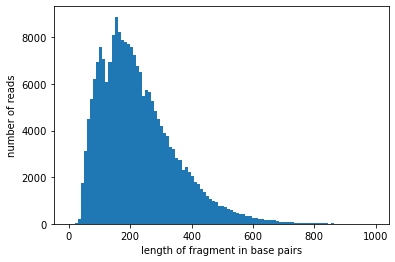

In [7]:
plt.hist(data.loc[(data.inlier==1)&  (data.frag_len < 1e3), 'frag_len'], bins=100)
plt.xlabel("length of fragment in base pairs")
plt.ylabel("number of reads")

Text(0.5, 0.92, 'MLE cluster assignments: cell 96')

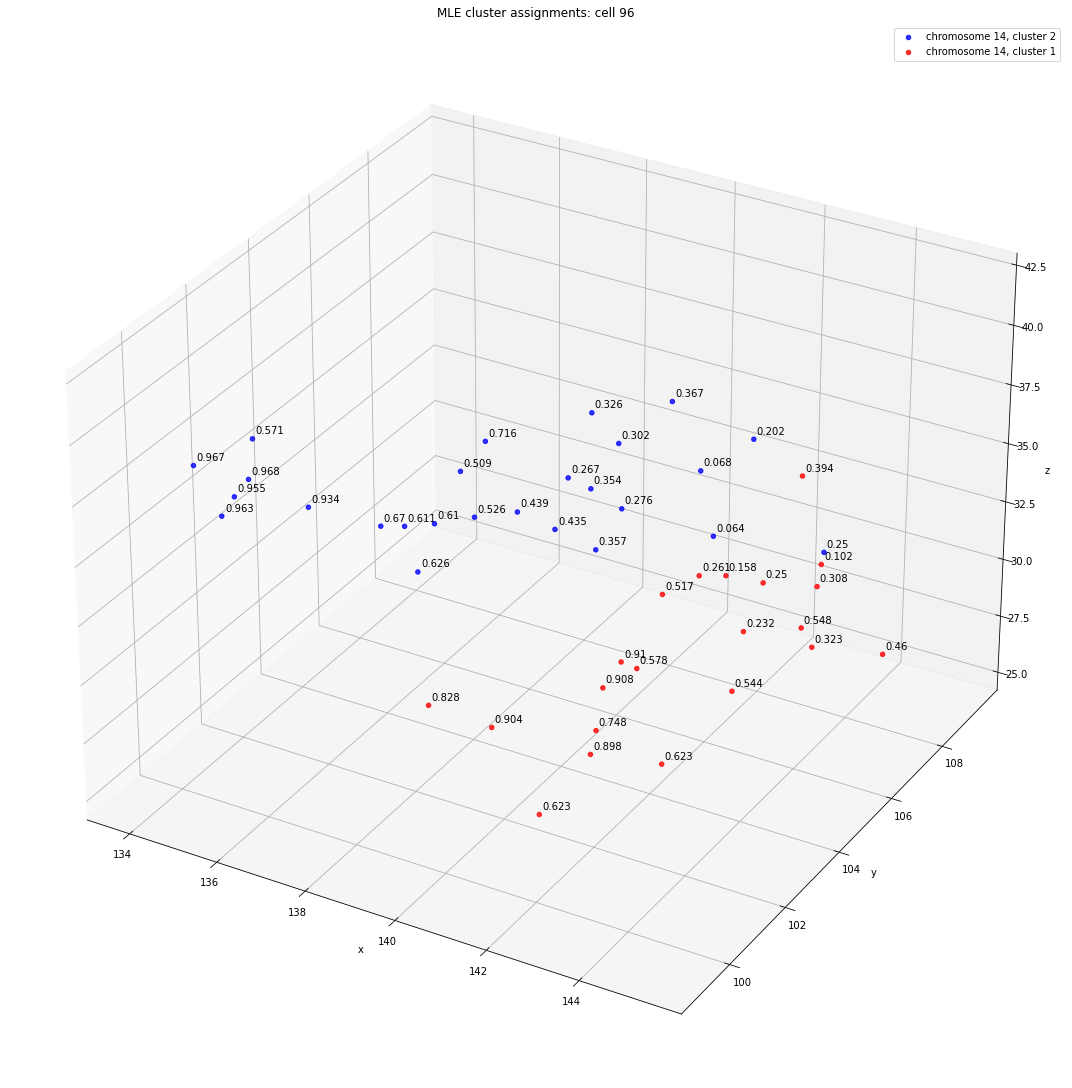

In [16]:
cell_index= 96
chr_ = 14
cell = data_simp.loc[data_simp.cell_index==cell_index]
cell_chr = data_simp.loc[(data_simp.cell_index==cell_index)&(data_simp.chr==chr_)]

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')
# ax.scatter(cell.x_um_abs, cell.y_um_abs, cell.z_um_abs, alpha = 0.2,color = 'gray', label = "all reads")
ax.scatter(cell_chr.loc[(cell_chr.cluster == 2), 'x_um_abs'], cell_chr.loc[(cell_chr.cluster == 2), 'y_um_abs'],cell_chr.loc[(cell_chr.cluster == 2), 'z_um_abs'], s = 20, 
            color = 'blue', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 2'.format(chr_))
ax.scatter(cell_chr.loc[(cell_chr.cluster == 1), 'x_um_abs'], cell_chr.loc[(cell_chr.cluster == 1), 'y_um_abs'],cell_chr.loc[(cell_chr.cluster == 1), 'z_um_abs'], s = 20, 
            color = 'red', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 1'.format(chr_))
# ax.scatter(cell_chr.loc[(cell_chr.cluster == -1), 'x_um_abs'], cell_chr.loc[(cell_chr.cluster == -1), 'y_um_abs'],cell_chr.loc[(cell_chr.cluster == -1), 'z_um_abs'], s = 20, 
#             color = 'green', marker = "o", alpha =1, label = 'chromosome {}, cluster 1'.format(chr_))

for _,read in cell_chr.iterrows():
    ax.text(read.x_um_abs, read.y_um_abs+0.1,read.z_um_abs+0.1, str(round(read.rel_chr_pos,3)))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.title("MLE cluster assignments: cell {}".format(cell_index))
# plt.savefig("figures/cell{}_chr{}_3D_clusters_annotated.png".format(cell_index,chr_))



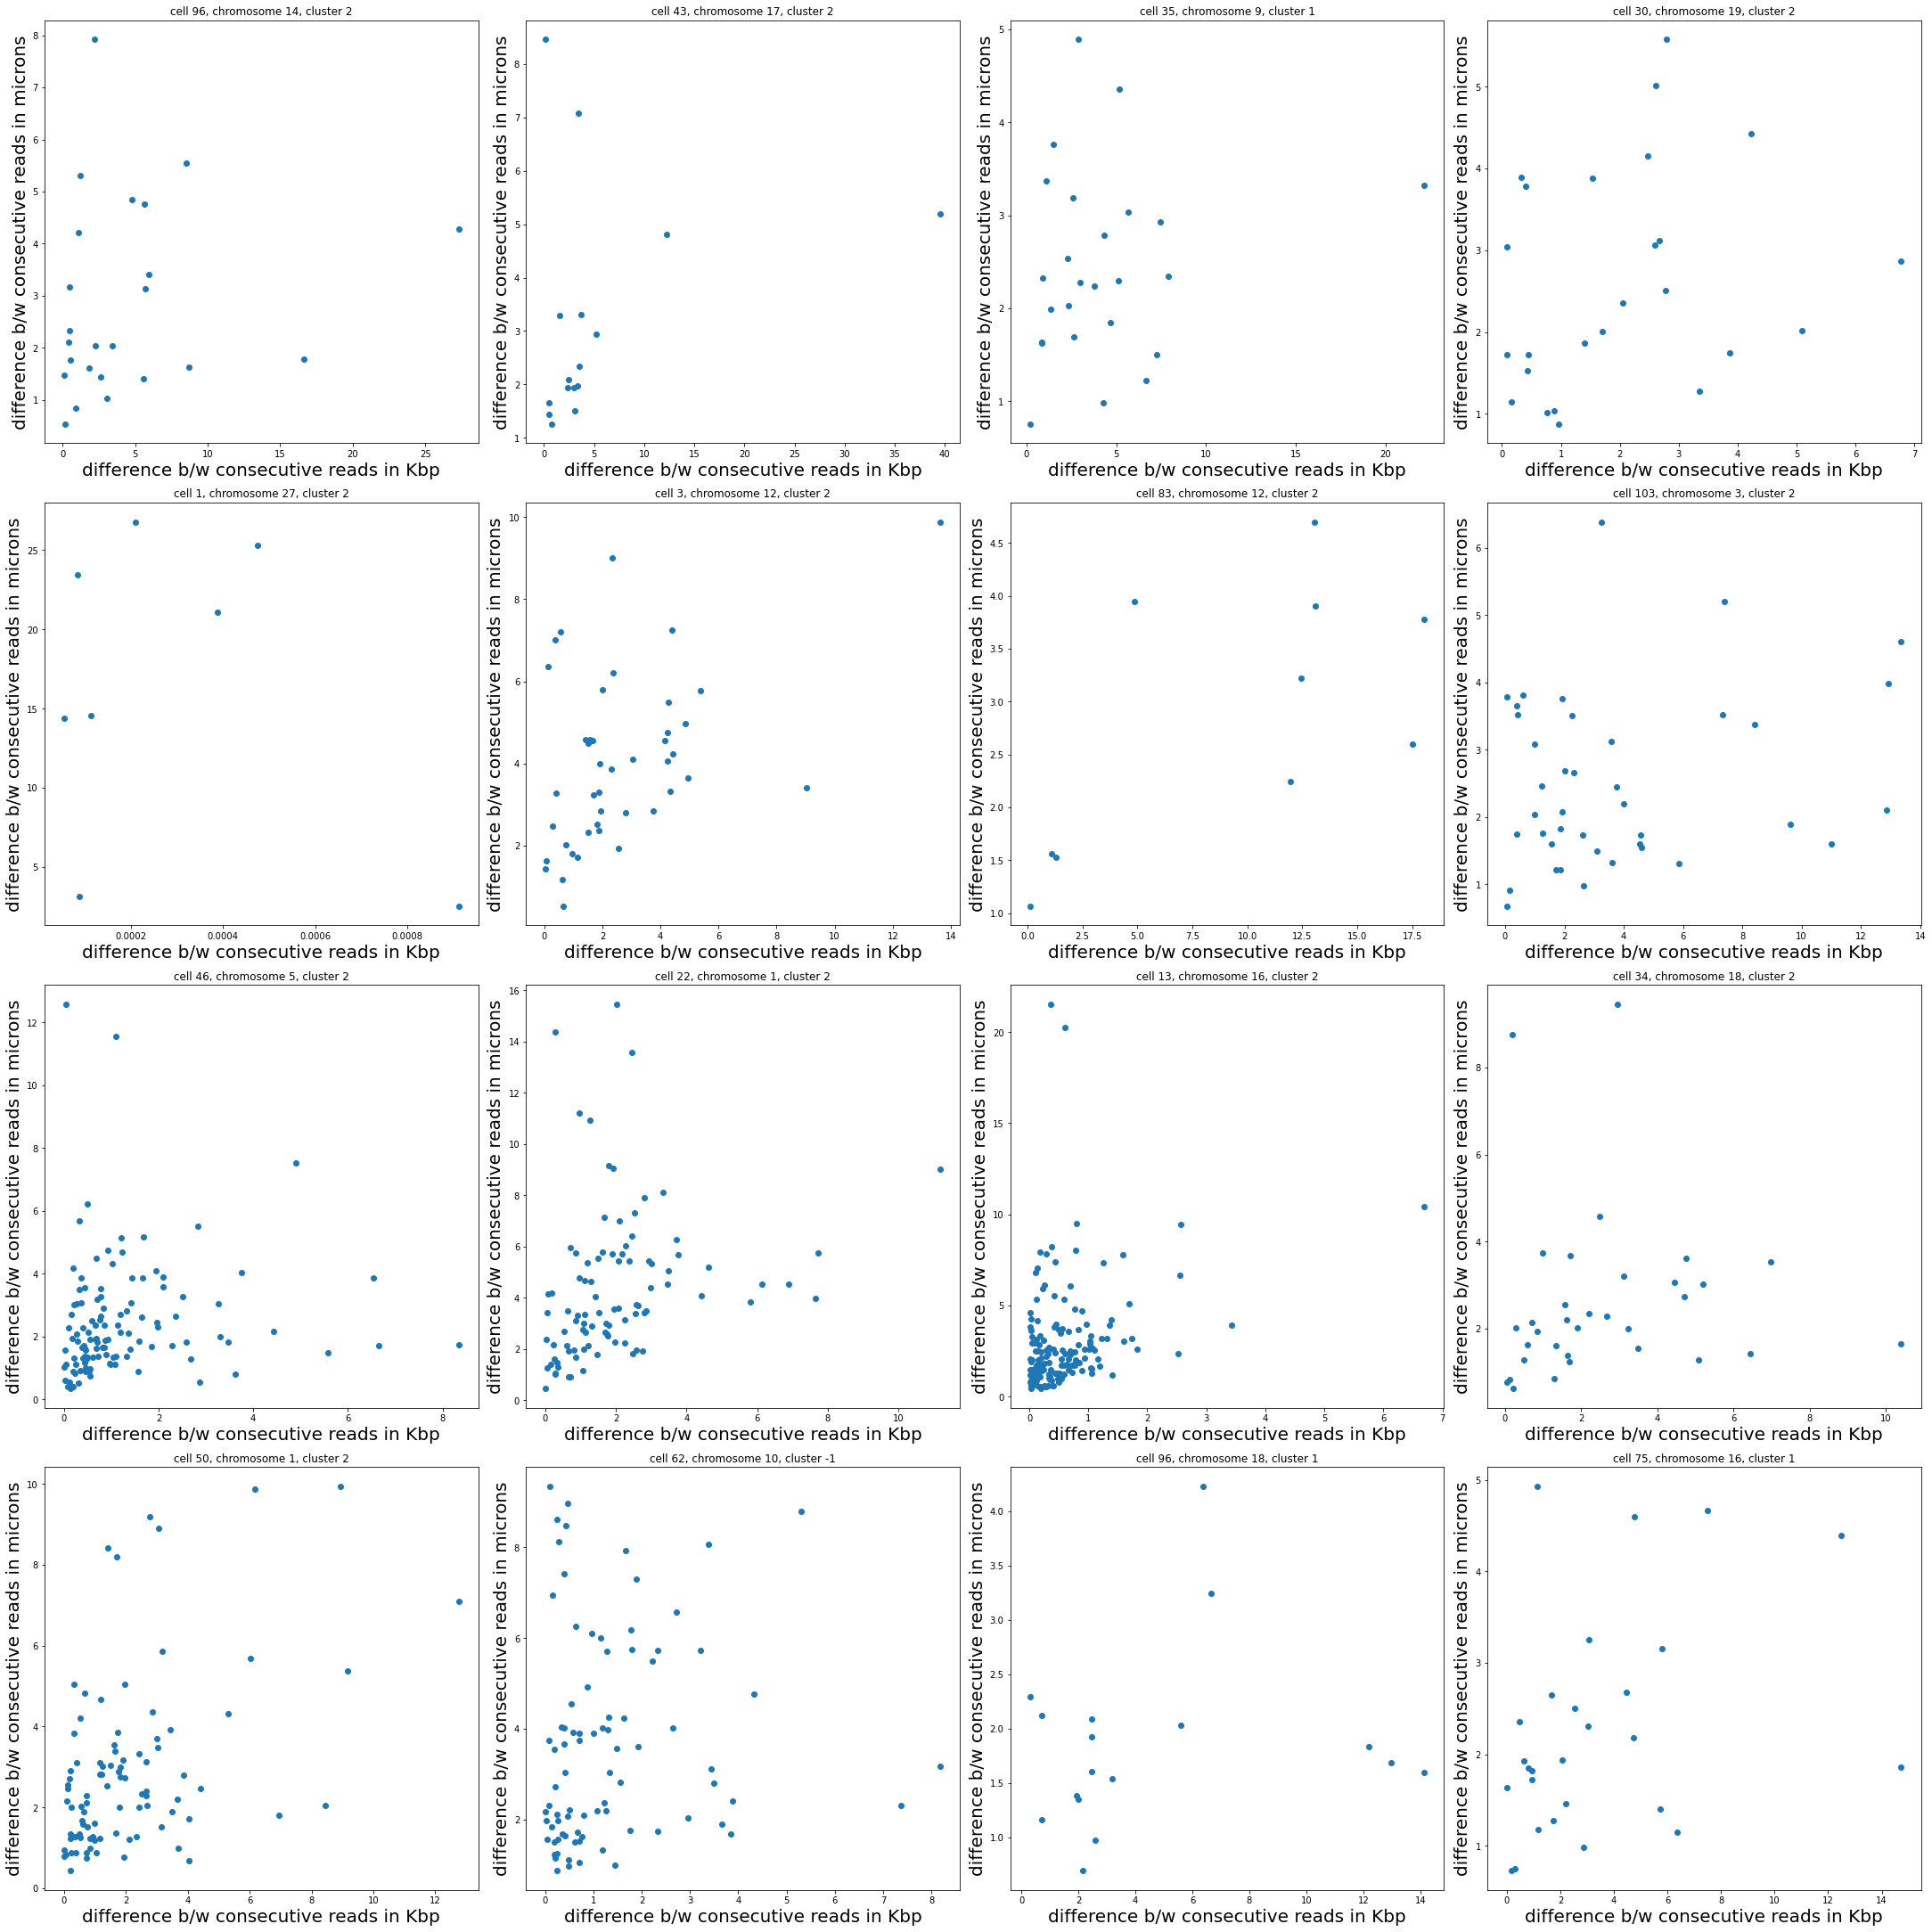

In [15]:
import random
plt.figure(figsize = (30,30))
plt.rcParams['figure.constrained_layout.use'] = True

for i in range(16):
    cell = np.random.randint(1,112, 1)[0]
    chr_ = random.choice(data_simp.loc[(data_simp.cell_index==cell),'chr'].unique())
    cell_chr = data_simp.loc[(data_simp.cell_index==cell) & (data_simp.chr==chr_)]
    cluster_val = cell_chr.cluster.unique()[0]
    cluster =  cell_chr.loc[cell_chr.cluster == cluster_val]
    
    cl = cluster.sort_values(by='rel_chr_pos').copy()
    cl["pos_diff"] = cl['pos'] + cl['frag_len'] - cl['pos'].shift(-1)
    cl['x_um_abs_diff'] = cl['x_um_abs'] - cl['x_um_abs'].shift(-1)
    cl['y_um_abs_diff'] = cl['y_um_abs'] - cl['y_um_abs'].shift(-1)
    cl['z_um_abs_diff'] = cl['z_um_abs'] - cl['z_um_abs'].shift(-1)
    cl['dist_diff'] = np.sqrt(np.square(cl[['x_um_abs_diff','y_um_abs_diff','z_um_abs_diff']]).sum(axis=1))
   
    plt.subplot(4,4,i+1)
    plt.scatter(np.abs(cl['pos_diff'])/1e6, cl['dist_diff'])
    plt.xlabel("difference b/w consecutive reads in Kbp",fontsize = 20)
    plt.ylabel("difference b/w consecutive reads in microns",fontsize = 20)
    plt.title("cell {}, chromosome {}, cluster {}".format(cell, chr_,cluster_val))
plt.savefig("figures/consecutive_reads_distance_vs_bp")

In [47]:
# reads = cell_chr.loc[(cell_chr.rel_chr_pos < 0.081) & (cell_chr.rel_chr_pos > 0.07) , ['x_um_abs','y_um_abs','z_um_abs']]
# pos1 = reads.iloc[0]
# pos2 = reads.iloc[1]

# np.linalg.norm(pos1-pos2)
cell_chr


embryo_id  cell_id  cell_index   stage  amp_ind    x_um_abs  \
41453         11        1          11  zygote    14535  110.339158   
42192         11        1          11  zygote    20472  111.422507   
43074         11        1          11  zygote    32136  100.264006   
43874         11        1          11  zygote    35751  101.672361   

         y_um_abs  z_um_abs  chr  hap_assignment  cluster  cluster_hap  \
41453  105.464084      26.2   27              -1        1           -1   
42192  105.897424      26.6   27              -1        1           -1   
43074  110.122488      28.6   27              -1        1           -1   
43874  107.847454      27.4   27              -1        1           -1   

       cluster_hap_imputed  inlier  rel_chr_pos  pos chr_territory  
41453                   -1       1          0.0    0          27_1  
42192                   -1       1          0.0    0          27_1  
43074                   -1       1          0.0    0          27_1  
43874                   -1       1          0.0    0          27_1

In [3]:
with pd.option_context('display.max_colwidth', None):
    display(description.style.set_properties(**{'text-align': 'left'}))

In [3]:
with pd.option_context('display.max_colwidth', None):
    display(data.head(10).style.set_properties(**{'text-align': 'left'}))

In [132]:
print(np.sort(data.cluster.unique()))
print(np.sort(data.cluster_hap.unique()))
print(np.sort(data.chr_name.unique()))
print(np.sort(data.cluster_hap_imputed.unique()))

[-1  0  1  2  3]
[-1  0  1]
['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17'
 'chr18' 'chr19' 'chr2' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8' 'chr9'
 'chrM' 'chrX' 'chrY' 'multi_umi' 'unlocalized' 'unplaced']
[-1  0  1]


#### Cluster values of 1 and 2 refer to the result of the k-means (k-2) clustering
#### cluster value of -1 refers to chromosomes that didn't cluster into two clusters (e.g. overlapping)
#### cluster value of 0 refers to chromosome Y (there's only 7 reads with this assignment)
#### cluster value of 3 refers to instances of trisomy which happens in cell indices 25, 26, 64

#### having an MLE cluster assignment (e.g. cluster != -1) doesn't guarantee having a haplotype assignment

In [19]:
len(data.loc[data.stage=='4cell','cell_index'].unique())

49

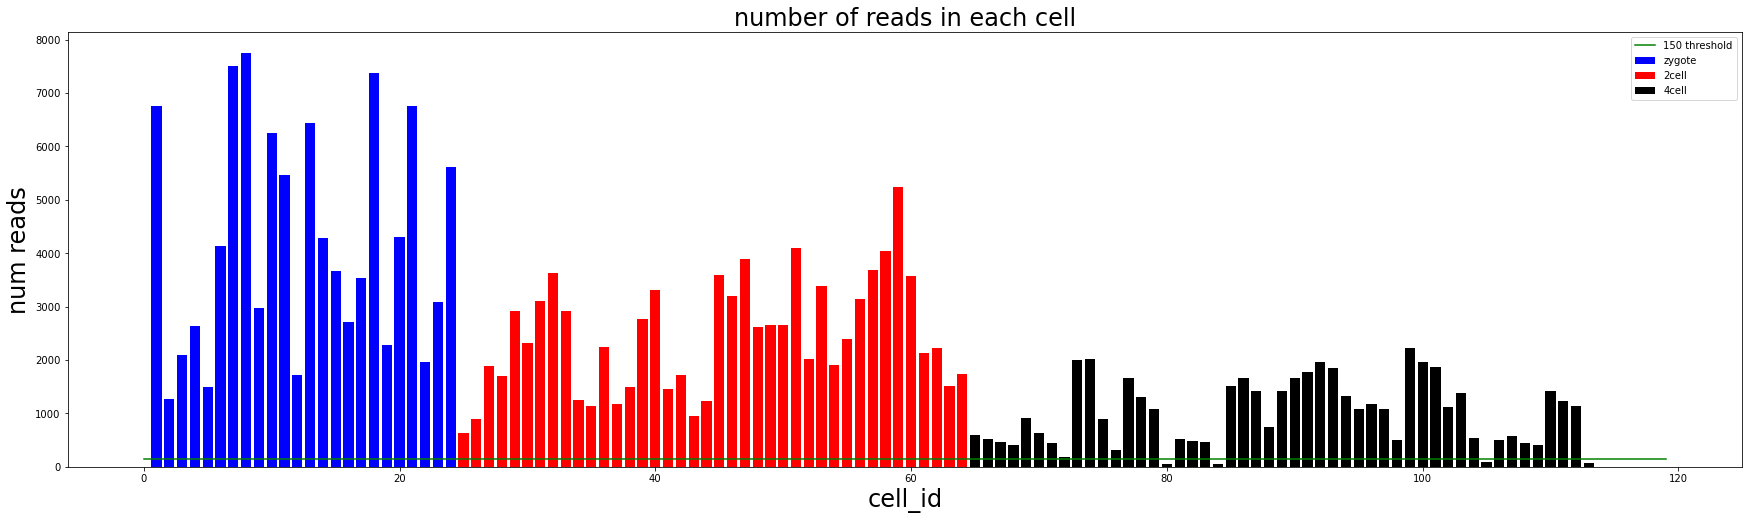

cells to remove:  [ 80.  84. 105. 113.]


In [14]:
cells = np.array(data.cell_index.unique())
cells_to_remove = np.array([])
stages = np.array(cells).astype(str)
num_reads = np.zeros_like(cells)
for i,cell_id in enumerate(cells):
    num_reads[i] = data.loc[data.cell_index==cell_id, 'amp_ind'].unique().shape[0]
    stages[i] = data.loc[data.cell_index==cell_id, 'stage'].unique()[0]
    if num_reads[i] < 150:
        cells_to_remove = np.append(cells_to_remove, cell_id)
plt.figure(figsize = (30,8))
plt.bar(cells[stages=='zygote'], num_reads[stages=='zygote'], color = 'blue', label = "zygote")
plt.bar(cells[stages=='2cell'], num_reads[stages=='2cell'], color = 'red', label = "2cell")
plt.bar(cells[stages=='4cell'], num_reads[stages=='4cell'], color = 'black', label = "4cell")
plt.plot(np.arange(0,120),150*np.ones(120), color='green', label = "150 threshold")

plt.xlabel("cell_id", fontsize = 24)
plt.ylabel("num reads", fontsize = 24)
plt.title("number of reads in each cell", fontsize = 24)
plt.legend()

plt.savefig("figures/num_reads_distribution.png")
plt.show()

print("cells to remove: ", cells_to_remove)

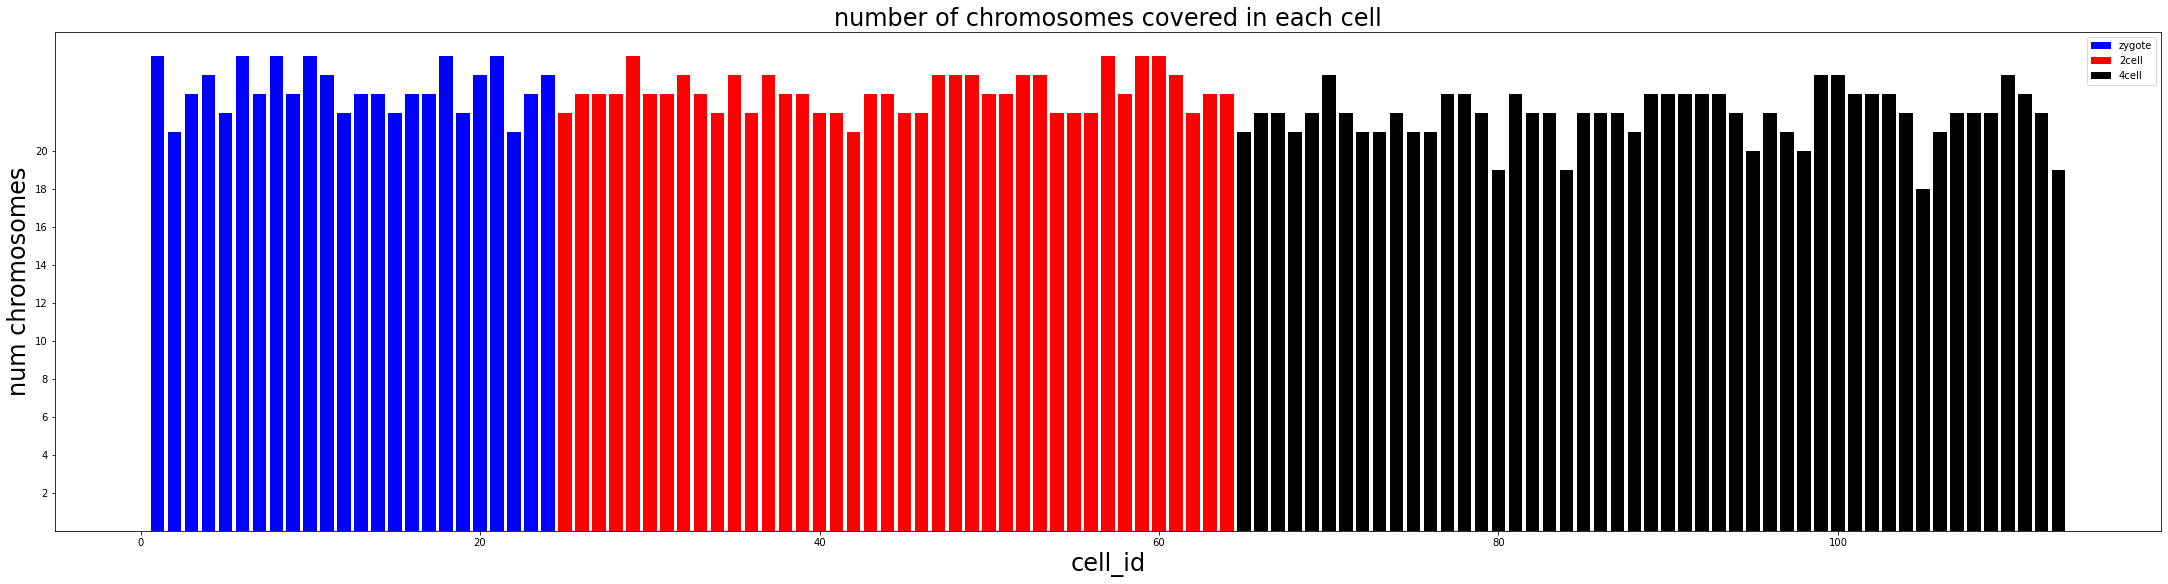

In [7]:
cells = np.array(data.cell_index.unique())
stages = np.array(cells).astype(str)
num_chromosomes = np.zeros_like(cells)
for i,cell_id in enumerate(cells):
    num_chromosomes[i] = data.loc[data.cell_index==cell_id, 'chr'].unique().shape[0]
    stages[i] = data.loc[data.cell_index==cell_id, 'stage'].unique()[0]

plt.figure(figsize = (30,8))
plt.bar(cells[stages=='zygote'], num_chromosomes[stages=='zygote'], color = 'blue', label = "zygote")
plt.bar(cells[stages=='2cell'], num_chromosomes[stages=='2cell'], color = 'red', label = "2cell")
plt.bar(cells[stages=='4cell'], num_chromosomes[stages=='4cell'], color = 'black', label = "4cell")

plt.xlabel("cell_id", fontsize = 24)
plt.ylabel("num chromosomes", fontsize = 24)
plt.title("number of chromosomes covered in each cell", fontsize = 24)
plt.legend()
plt.yticks(np.arange(2,21,2))
plt.savefig("figures/num_chromosomes_distribution_rawdata.png")
plt.show()

In [40]:
chr_lengths = {}
with open('mm10.chrom.sizes', 'r') as file:
    lines = file.readlines()[0:22]
    for line in lines:
        chr_name = line.strip().split('\t')[0]
        chr_length = int(line.strip().split('\t')[1])
        if chr_name == 'chrX': chr_lengths[20] =  chr_length
        elif chr_name == 'chrY': chr_lengths[21] =  chr_length
        else:
            try:
                chr_lengths[int(chr_name[3:])] =  chr_length
            except:
                continue
print(chr_lengths)

{1: 195471971, 2: 182113224, 20: 171031299, 3: 160039680, 4: 156508116, 5: 151834684, 6: 149736546, 7: 145441459, 10: 130694993, 8: 129401213, 14: 124902244, 9: 124595110, 11: 122082543, 13: 120421639, 12: 120129022, 15: 104043685, 16: 98207768, 17: 94987271, 21: 91744698, 18: 90702639, 19: 61431566}


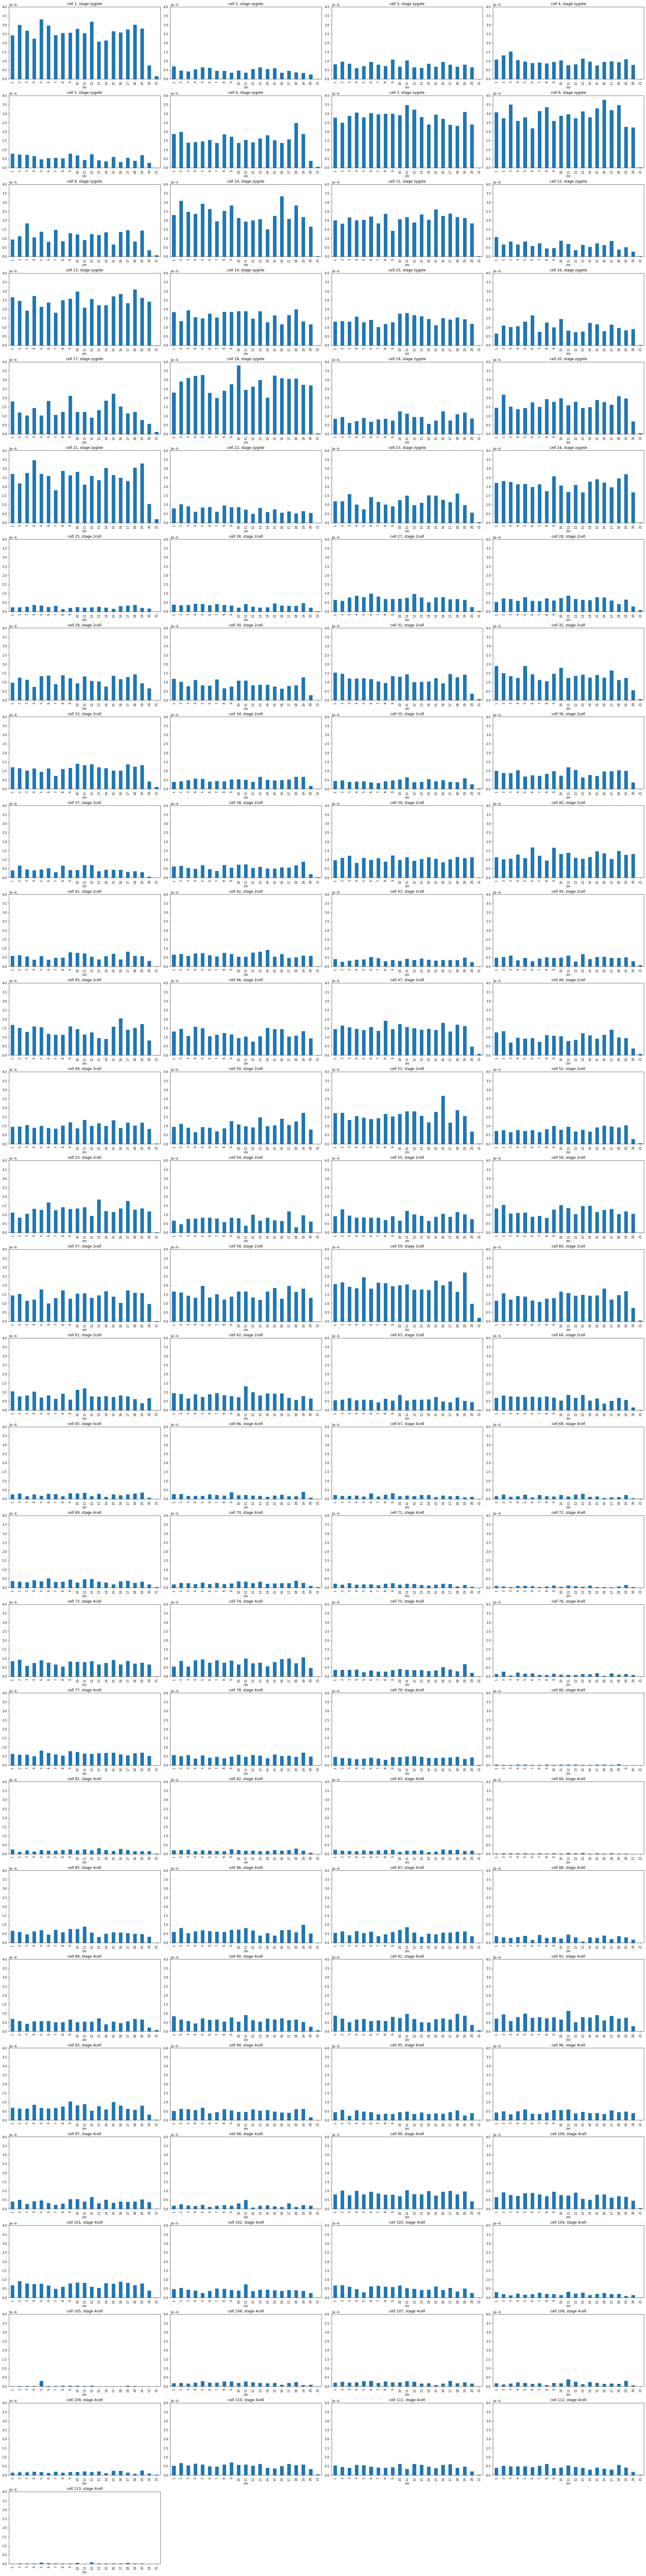

In [72]:
plt.figure(figsize = (30,120))
plt.rcParams['figure.constrained_layout.use'] = True
cells = np.array(data.cell_index.unique())
stages = np.array(cells).astype(str)
#a plot for each cell: one bar per chromosome, where the height of the bar corresponds to the number of reads for that chromosome

# for i,cell_id in enumerate(cells):
#     plt.subplot(29, 4, i+1)
#     reads = data.loc[data.cell_index == cell_id].groupby('chr').size() #height of each bar: number of reads for each chromosome
#     reads.plot(kind="bar", xlabel="chr", ylim=(0,500) )
#     stage = data.loc[data.cell_index==cell_id, 'stage'].unique()[0]
#     plt.title("cell {}, stage {}".format(cell_id, stage))
# plt.savefig("figures/read_dist_per_cell.png")
  
data_modified = data.loc[data.chr < 22]
for i,cell_id in enumerate(cells):
    plt.subplot(29, 4, i+1)
    reads = data_modified.loc[data_modified.cell_index == cell_id].groupby('chr').size().to_frame(name="num_reads") #height of each bar: number of reads for each chromosome  
    for chr_ in chr_lengths.keys():
        reads.loc[chr_, "len"] = chr_lengths[chr_]
    reads["normalized_len"] = reads.num_reads / reads.len
    reads.normalized_len.plot(kind="bar", xlabel="chr" , ylim=(0,4e-6))
    stage = data.loc[data.cell_index==cell_id, 'stage'].unique()[0]
    plt.title("cell {}, stage {}".format(cell_id, stage))
plt.savefig("figures/read_dist_per_cell_normalized.png")
    


In [9]:
data_simp = data[['embryo_id', 
                  'cell_id',
                  'cell_index',
                  'stage',
                  'amp_ind',
                  'x_um_abs',
                  'y_um_abs',
                  'z_um_abs',
                  'chr',
                  'hap_assignment',
                  'cluster',
                  'cluster_hap',
                  'cluster_hap_imputed',
                  'inlier',
                  'rel_chr_pos',
                  'pos',
                  'frag_len'
                 ]].copy()
print("starting with {} reads".format(data_simp.shape[0]))
# data_simp = data_simp.loc[~data_simp.cell_index.isin([ 80.,  84., 105., 113.])] # removing cells with less than 150 reads
data_simp = data_simp.loc[data_simp.inlier == 1]  #removing reads that don't fall within a chromosome territory
#cluster val of 3, chr val of >21,

print("ending with {} reads".format(data_simp.shape[0]))

data_simp["chr_territory"] = data_simp["chr"].astype(str) + "_" + data_simp["cluster"].astype(str)
print('{} unique territories across all cells'.format(len(data_simp.chr_territory.unique())))
data_simp.to_csv("data/filtered_embryo_data.csv", index = False)



starting with 249733 reads
ending with 230060 reads
62 unique territories across all cells


#### chromosome 2, 6, 16, are never unassigned
#### chromosome 21 (the Y chromosome) always has cluster 1
#### chromosome 20 (X) sometimes has two clusters for females and one cluster for males

In [22]:
np.sort(data_simp.chr_territory.unique())

array(['10_-1', '10_1', '10_2', '10_3', '11_-1', '11_1', '11_2', '12_-1',
       '12_1', '12_2', '13_-1', '13_1', '13_2', '14_-1', '14_1', '14_2',
       '15_-1', '15_1', '15_2', '15_3', '16_1', '16_2', '17_-1', '17_1',
       '17_2', '18_-1', '18_1', '18_2', '19_-1', '19_1', '19_2', '1_-1',
       '1_1', '1_2', '1_3', '20_1', '20_2', '21_1', '27_1', '27_2', '2_1',
       '2_2', '3_-1', '3_1', '3_2', '4_-1', '4_1', '4_2', '5_-1', '5_1',
       '5_2', '6_1', '6_2', '7_-1', '7_1', '7_2', '8_-1', '8_1', '8_2',
       '9_-1', '9_1', '9_2'], dtype=object)

In [4]:
data_simp = pd.read_csv('data/filtered_embryo_data.csv')
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
data_simp

embryo_id  cell_id  cell_index   stage  amp_ind    x_um_abs  \
0               1        1           1  zygote        1  124.747708   
1               1        1           1  zygote        3  117.380930   
2               1        1           1  zygote        5  114.455886   
3               1        1           1  zygote        6  112.072517   
4               1        1           1  zygote        9  105.139080   
...           ...      ...         ...     ...      ...         ...   
230055         57        3         112   4cell     8058  135.906208   
230056         57        3         112   4cell     8066  140.456277   
230057         57        3         112   4cell     8069  145.656355   
230058         57        3         112   4cell     8101  134.606189   
230059         57        3         112   4cell     8143  140.781282   

          y_um_abs  z_um_abs  chr  hap_assignment  cluster  cluster_hap  \
0       139.589597      20.2    9              -1        2            1   
1       143.597991      42.6   14              -1        2            1   
2       125.831057      28.2    3              -1        2            1   
3       136.881223      24.6    5              -1        2            1   
4       154.214817      49.8    8              -1        1            0   
...            ...       ...  ...             ...      ...          ...   
230055   99.505662      27.8    6              -1        1           -1   
230056   98.638982      22.2   18              -1        1            1   
230057   98.855652      31.8    9              -1        2           -1   
230058  106.872439      29.4    7              -1        1            1   
230059  109.689148      29.4   12              -1        1           -1   

        cluster_hap_imputed  inlier  rel_chr_pos       pos chr_territory  
0                         1       1     0.295407  36806207           9_2  
1                         1       1     0.687235  85837228          14_2  
2                         1       1     0.250217  40044705           3_2  
3                         1       1     0.066720  10130419           5_2  
4                         0       1     0.765385  99041722           8_1  
...                     ...     ...          ...       ...           ...  
230055                   -1       1     0.607196  90919417           6_1  
230056                    1       1     0.713609  64726190          18_1  
230057                   -1       1     0.445051  55451131           9_2  
230058                    1       1     0.453007  65886029           7_1  
230059                   -1       1     0.710489  85350291          12_1  

[230060 rows x 17 columns]

## **Visualizing Cluster assignemnts (MLE and visual inspection)**

In [7]:
# plt.hist(data_simp.loc[data_simp.cluster_hap_imputed,data_simp.stage])
data_simp.loc[data_simp.cell_index==100]

embryo_id  cell_id  cell_index  stage  amp_ind    x_um_abs  \
218618         54        2         100  4cell        2   97.880637   
218619         54        2         100  4cell        3   96.580618   
218620         54        2         100  4cell        4   94.197249   
218621         54        2         100  4cell        7   80.222039   
218622         54        2         100  4cell        8   94.197249   
...           ...      ...         ...    ...      ...         ...   
220361         54        2         100  4cell     8947   87.263811   
220362         54        2         100  4cell     8950   80.438708   
220363         54        2         100  4cell     8953   83.147083   
220364         54        2         100  4cell     8993   81.847063   
220365         54        2         100  4cell     9031  103.839060   

          y_um_abs  z_um_abs  chr  hap_assignment  cluster  cluster_hap  \
218618  101.130686      22.6   16              -1        2           -1   
218619  101.997366      23.0   16              -1        2           -1   
218620  103.839060      19.4   19              -1        1           -1   
218621  101.022351      29.0    6              -1        2            1   
218622  103.405720      21.0   19              -1        1           -1   
...            ...       ...  ...             ...      ...          ...   
220361  100.480676      25.0   16              -1        1            1   
220362  103.405720      32.2    6              -1        2            1   
220363  108.280793      21.4    1              -1        1            1   
220364  101.239021      21.4   17              -1        1           -1   
220365  100.914016      32.2    4              -1        2            0   

        cluster_hap_imputed  inlier chr_territory  
218618                    0       1          16_2  
218619                    0       1          16_2  
218620                   -1       1          19_1  
218621                    1       1           6_2  
218622                   -1       1          19_1  
...                     ...     ...           ...  
220361                    1       1          16_1  
220362                    1       1           6_2  
220363                    1       1           1_1  
220364                   -1       1          17_1  
220365                    0       1           4_2  

[1748 rows x 15 columns]

In [19]:
cell_1 = data_simp[data_simp.cell_index == 25].copy()
color_map = {-1: "blue",  #unassigned
          0: "gray",  
          1: "gray", 
          2: "gray",
          3: "red"} 
cell_1["cluster_color"] = cell_1.cluster.map(color_map)

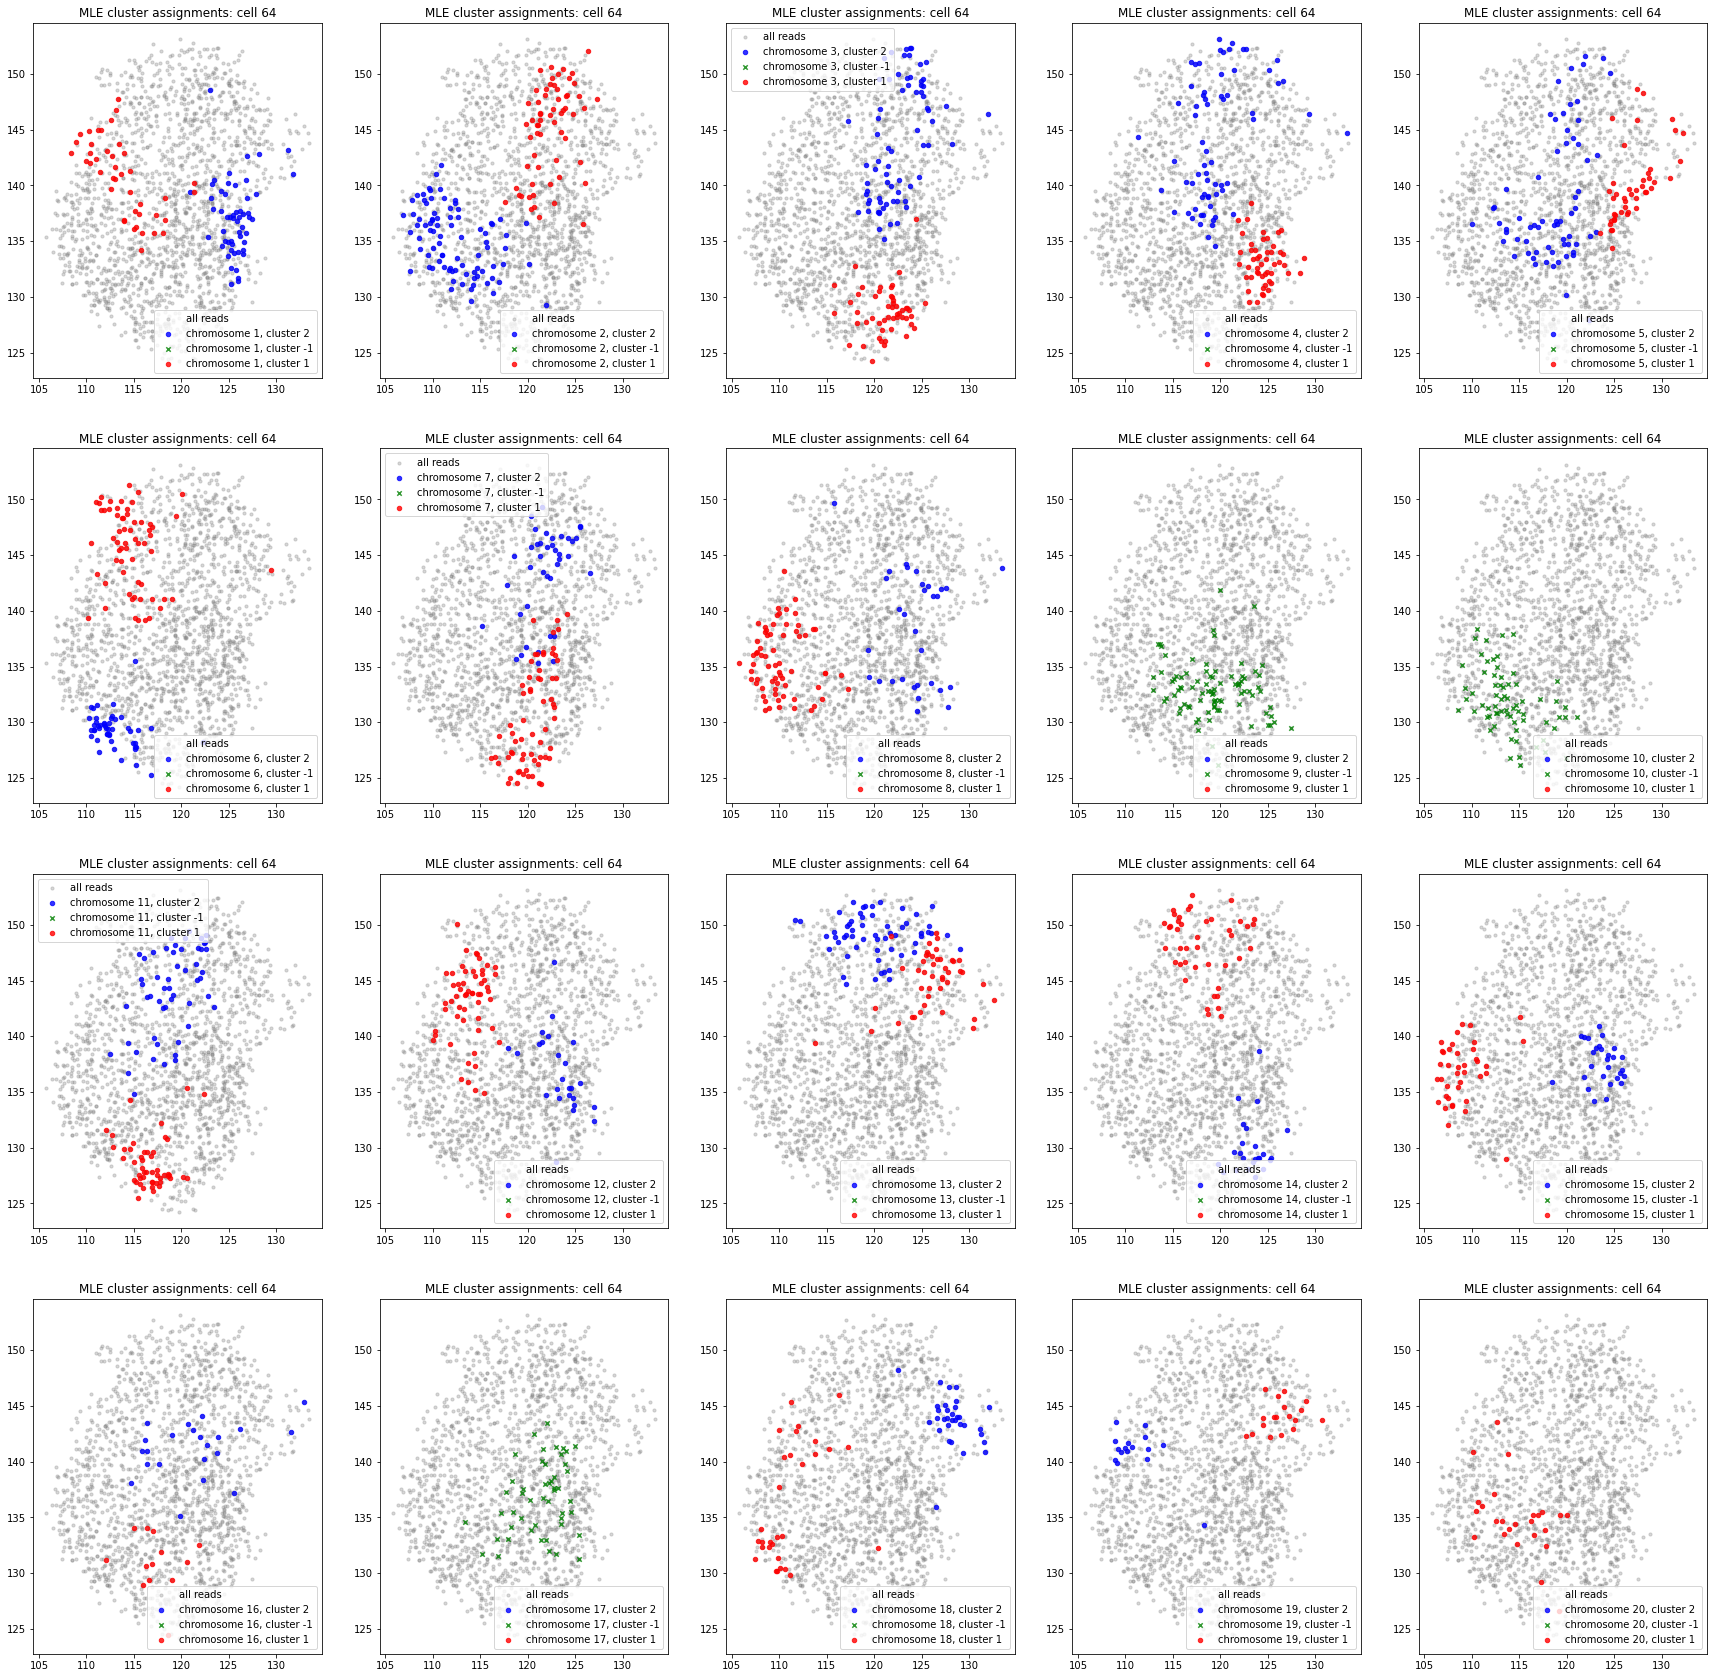

In [37]:
cell_index = 64
cell_1 = data_simp[data_simp.cell_index == cell_index]

fig = plt.figure(figsize = (30,30))
for chromosome in range(1,21):
    plt.subplot(4,5,chromosome)
    plt.scatter(cell_1.x_um_abs, cell_1.y_um_abs, s = 10, 
                color = 'gray',  marker = "o", alpha = 0.3, label = 'all reads')
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 2), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 2), 'y_um_abs'], s = 20, 
                color = 'blue', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 2'.format(chromosome))
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == -1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == -1), 'y_um_abs'], s = 20, 
                color = 'green', marker = "x", alpha = 0.8, label = 'chromosome {}, cluster -1'.format(chromosome))
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 1), 'y_um_abs'], s = 20, 
                color = 'red', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 1'.format(chromosome))
    plt.legend()
    plt.title("MLE cluster assignments: cell {}".format(cell_index))
plt.savefig("figures/cell{}_clusters.png".format(cell_index))

Text(0.5, 1.0, 'MLE cluster assignments: cell 25')

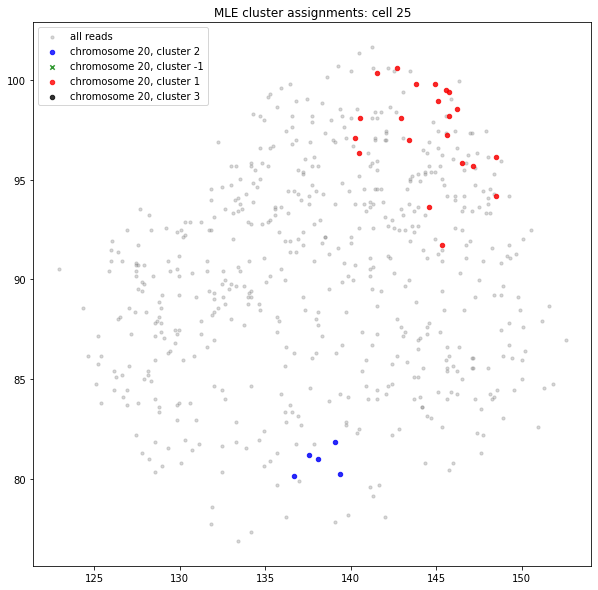

In [76]:
cell_index = 25
cell_1 = data_simp[data_simp.cell_index == cell_index].copy()
chromosome = 20
fig = plt.figure(figsize = (10,10))
plt.scatter(cell_1.x_um_abs, cell_1.y_um_abs, s = 10, 
                color = 'gray',  marker = "o", alpha = 0.3, label = 'all reads')
plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 2), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 2), 'y_um_abs'], s = 20, 
            color = 'blue', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 2'.format(chromosome))
plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == -1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == -1), 'y_um_abs'], s = 20, 
            color = 'green', marker = "x", alpha = 0.8, label = 'chromosome {}, cluster -1'.format(chromosome))
plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 1), 'y_um_abs'], s = 20, 
            color = 'red', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 1'.format(chromosome))
plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 3), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 3), 'y_um_abs'], s = 20, 
        color = 'black', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 3'.format(chromosome))


plt.legend()
plt.title("MLE cluster assignments: cell {}".format(cell_index))



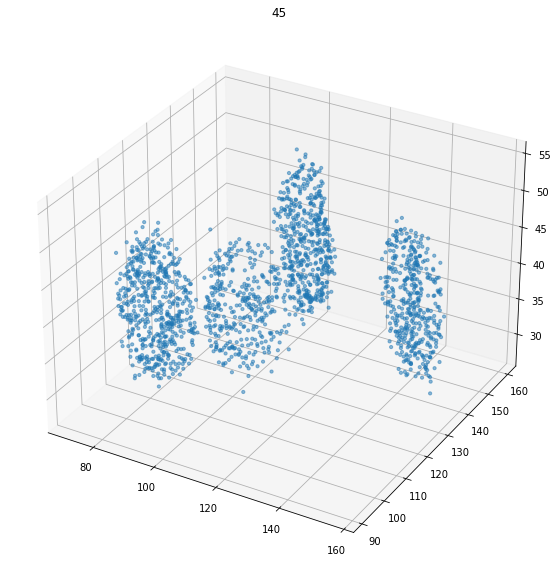

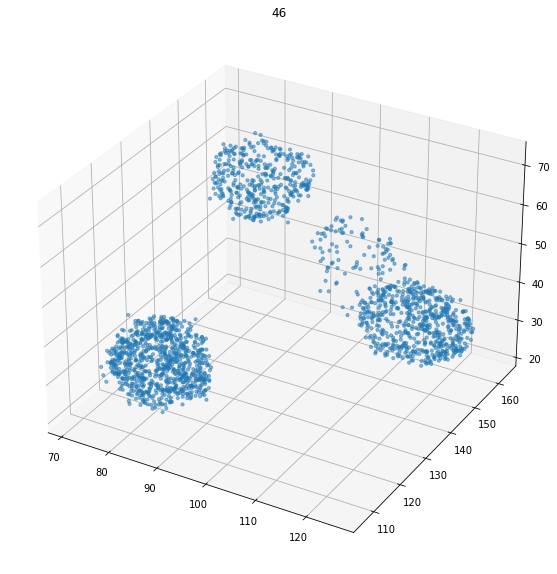

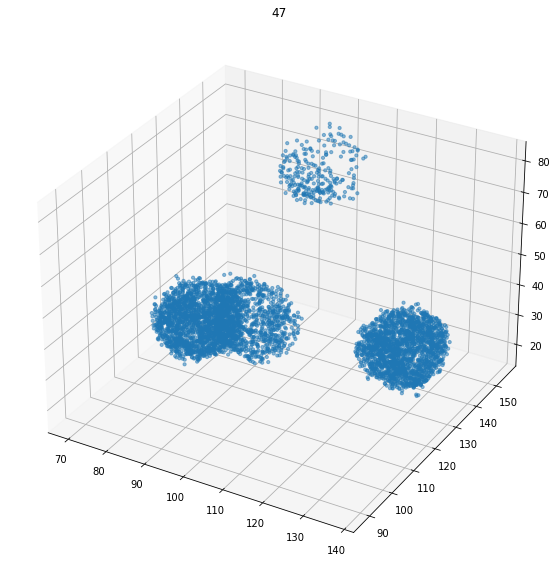

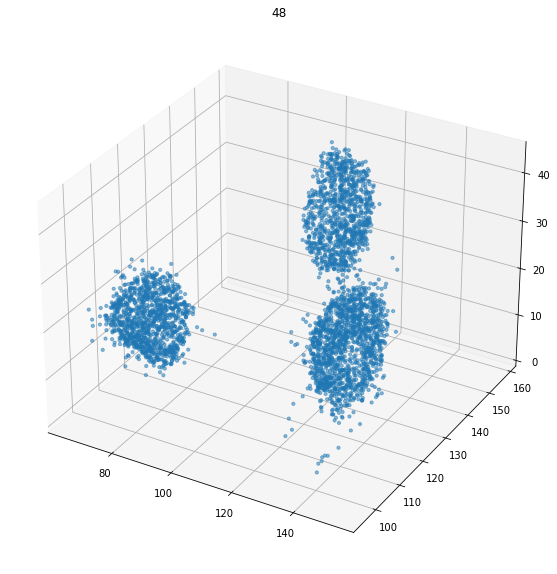

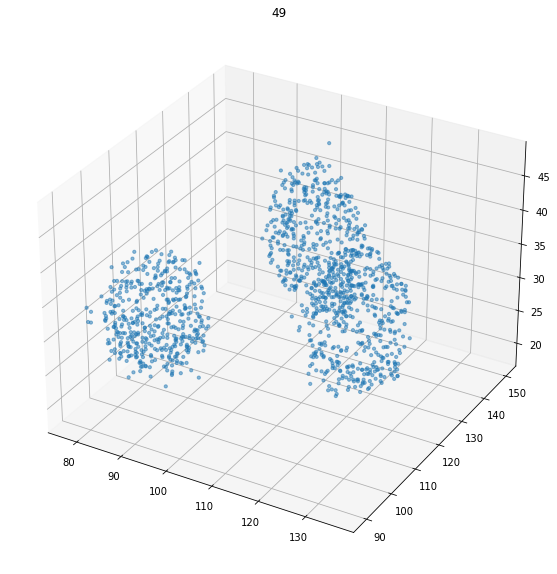

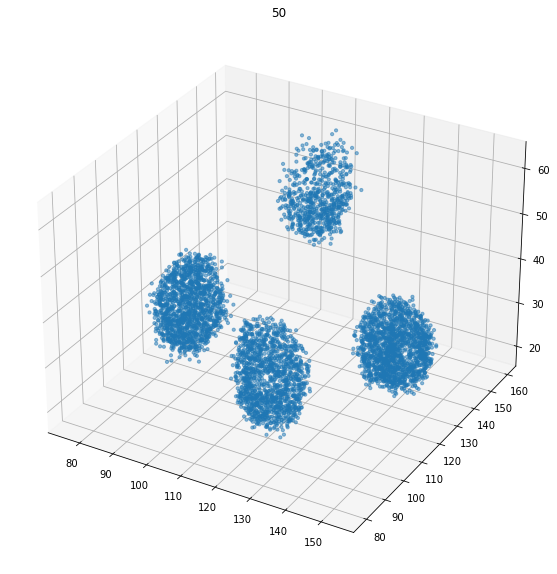

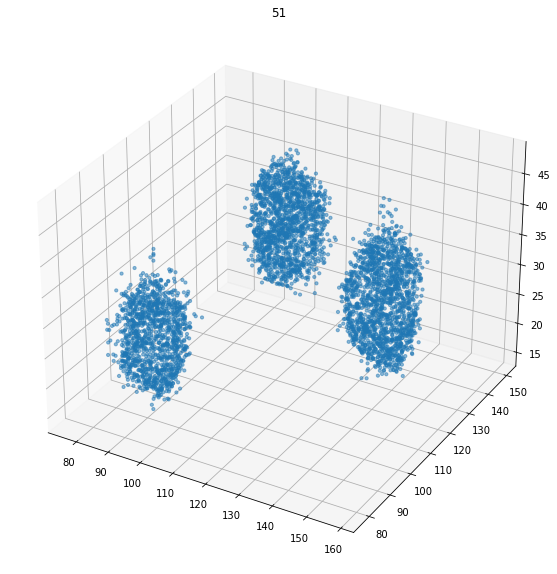

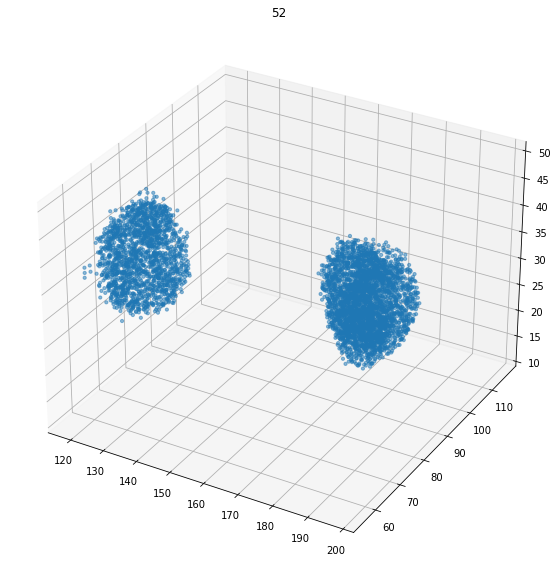

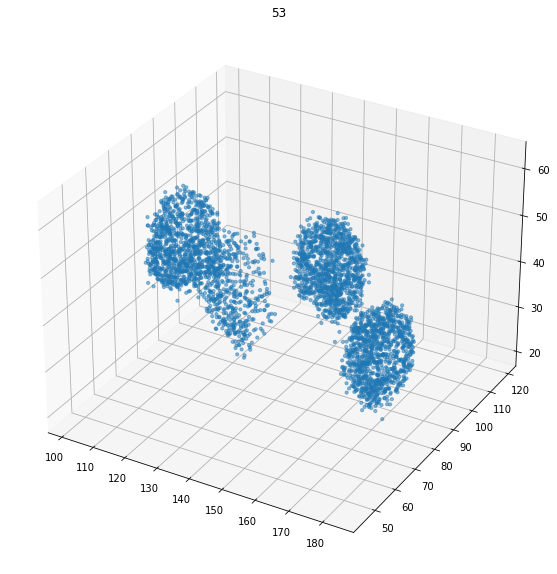

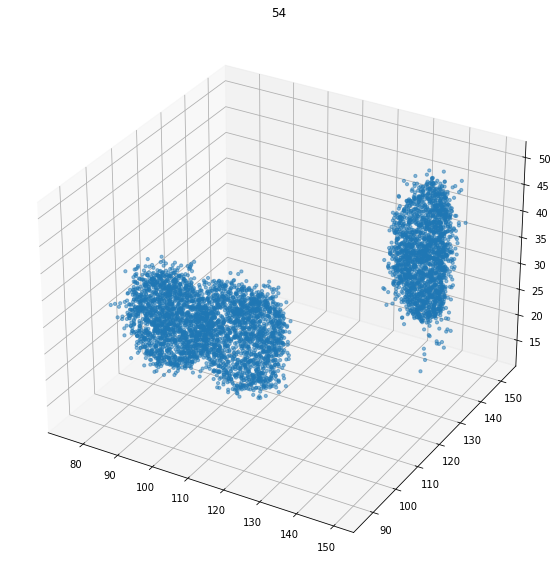

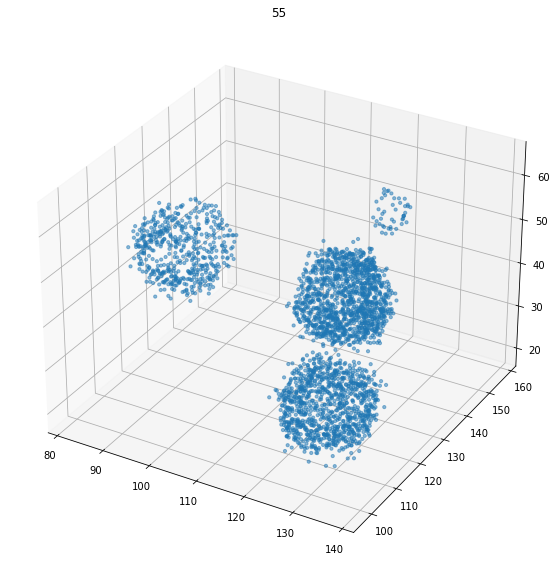

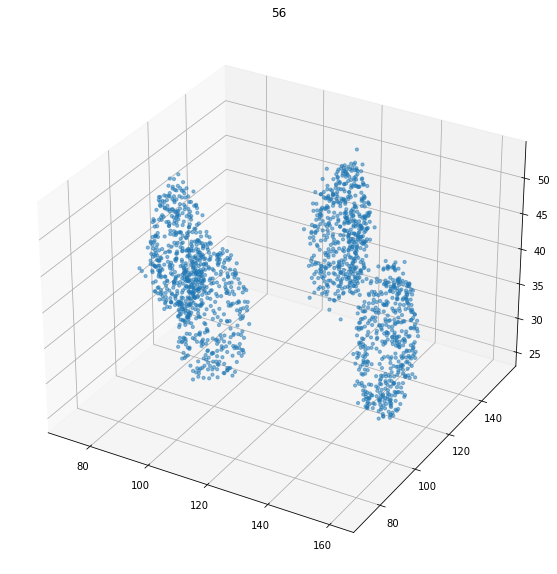

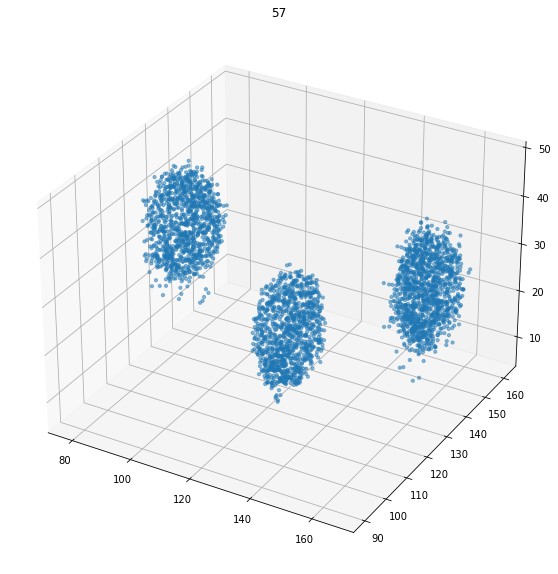

In [5]:
for embryo_id in range(45,58):
    embryo = data_simp.loc[data_simp.embryo_id == embryo_id].copy()

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(projection='3d')
    points = ax.scatter(embryo.x_um_abs, embryo.y_um_abs, embryo.z_um_abs, s = 10, 
                marker = "o", alpha = 0.5)
    plt.title(embryo_id)


## **Visualizing Haplotype assignemnts**

In [12]:
zygotes = data_simp[data_simp.stage.astype(str) == "zygote"]
cell_1 = zygotes[zygotes.cell_index == 1].copy()
#hap_assignment: haplotype assignment of each read
color_map = {-1: "gray",  #unassigned
          0: "red",  #maternal
          1: "blue", #paternal
          2: "green"} #conflicting
cell_1["hap_assignment_color"] = cell_1.hap_assignment.map(color_map)
cell_1["hap_assignment_color_imputed"] = cell_1.cluster_hap_imputed.map(color_map)
# np.sort(zygotes.chr.unique())

No handles with labels found to put in legend.


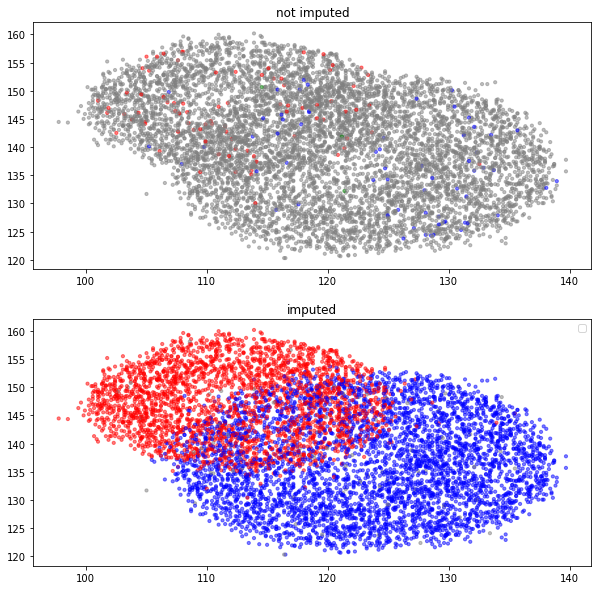

In [13]:
fig = plt.figure(figsize = (10,10))
plt.subplot(211)
plt.scatter(cell_1.x_um_abs, cell_1.y_um_abs, s = 10, 
            color = cell_1.hap_assignment_color, 
            marker = "o", alpha = 0.5)
plt.title("not imputed")

plt.subplot(212)
plt.scatter(cell_1.x_um_abs, cell_1.y_um_abs, s = 10, 
            color = cell_1.hap_assignment_color_imputed, 
            marker = "o", alpha = 0.5)
plt.title("imputed")
plt.legend()

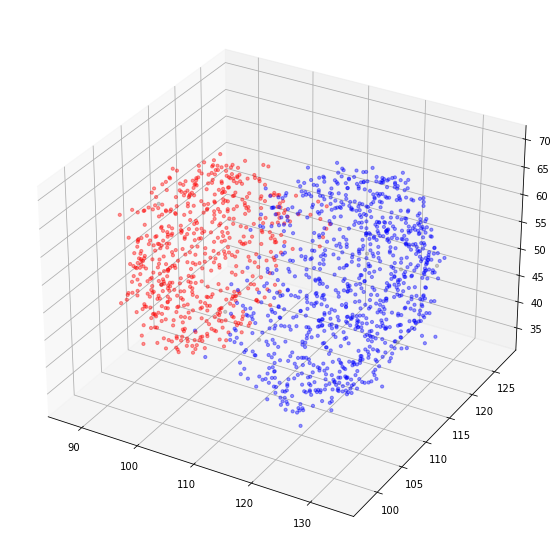

In [79]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(cell_1.x_um_abs, cell_1.y_um_abs, cell_1.z_um_abs, 
           s = 10, color = cell_1.hap_assignment_color_imputed, 
            marker = "o", alpha = 0.4)

## **Visualizing Chromosome Territories**

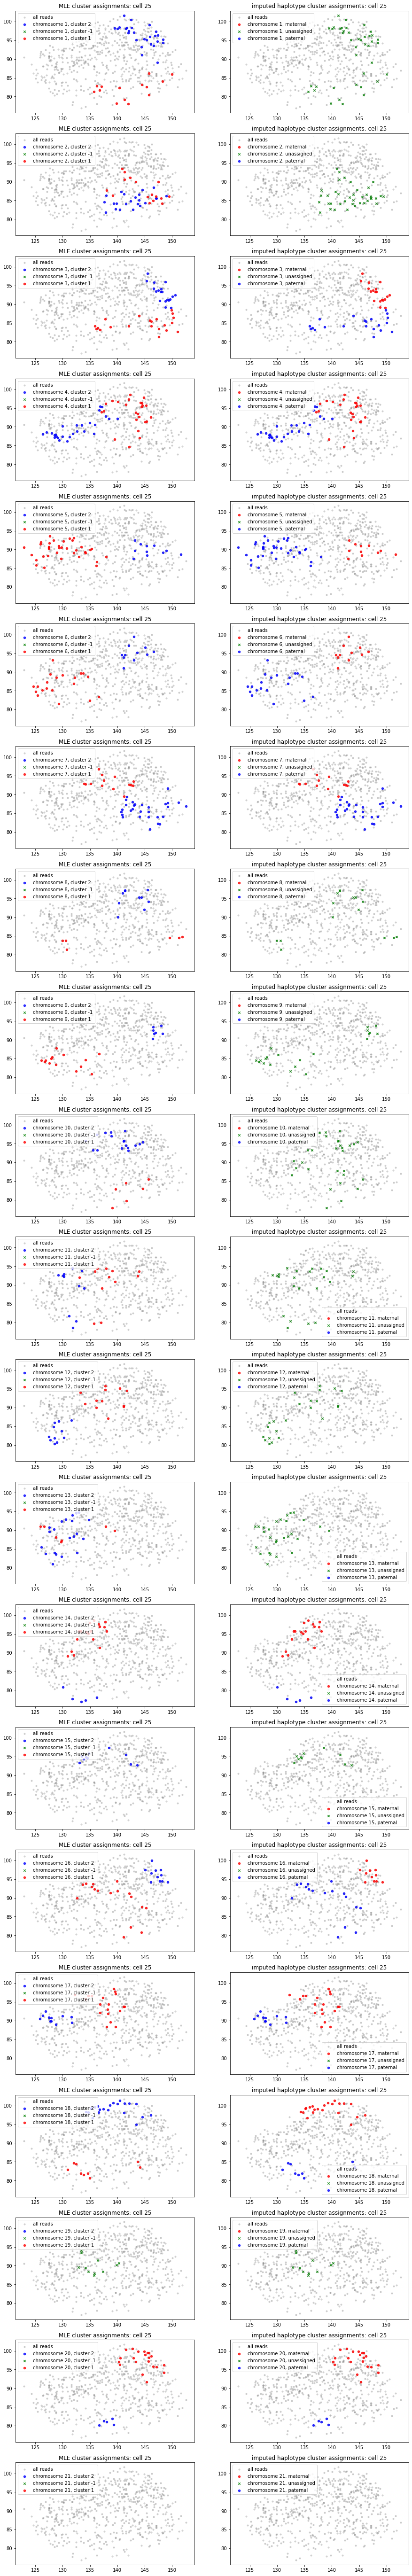

In [5]:
cell_index = 25
cell_1 = data_simp[data_simp.cell_index == cell_index]

fig = plt.figure(figsize = (15,100))
for chromosome in range(1,22):
    plt.subplot(21,2,2*chromosome-1)
    plt.scatter(cell_1.x_um_abs, cell_1.y_um_abs, s = 10, 
                color = 'gray',  marker = "o", alpha = 0.3, label = 'all reads')
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 2), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 2), 'y_um_abs'], s = 20, 
                color = 'blue', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 2'.format(chromosome))
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == -1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == -1), 'y_um_abs'], s = 20, 
                color = 'green', marker = "x", alpha = 0.8, label = 'chromosome {}, cluster -1'.format(chromosome))
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster == 1), 'y_um_abs'], s = 20, 
                color = 'red', marker = "o", alpha = 0.8, label = 'chromosome {}, cluster 1'.format(chromosome))
    plt.legend()
    plt.title("MLE cluster assignments: cell {}".format(cell_index))
    
    
    plt.subplot(21,2,2*chromosome)
    plt.scatter(cell_1.x_um_abs, cell_1.y_um_abs, s = 10, 
                color = 'gray',  marker = "o", alpha = 0.3, label = 'all reads')
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster_hap_imputed == 0), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster_hap_imputed == 0), 'y_um_abs'], s = 20, 
                color = 'red', marker = "o", alpha = 0.8, label = 'chromosome {}, maternal'.format(chromosome))
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster_hap_imputed == -1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster_hap_imputed == -1), 'y_um_abs'], s = 20, 
                color = 'green', marker = "x", alpha = 0.8, label = 'chromosome {}, unassigned'.format(chromosome))
    plt.scatter(cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster_hap_imputed == 1), 'x_um_abs'], cell_1.loc[(cell_1.chr == chromosome)&(cell_1.cluster_hap_imputed == 1), 'y_um_abs'], s = 20, 
                color = 'blue', marker = "o", alpha = 0.8, label = 'chromosome {}, paternal'.format(chromosome))
    plt.legend()
    plt.title("imputed haplotype cluster assignments: cell {}".format(cell_index))
    
    
    
    
plt.savefig("figures/cell{}_clusters.png".format(cell_index))

## Haplotype Separation Calculation

In [188]:
def return_separation_scores(data_in, K = 100):
    t_start = time.time()
    data = data_in.copy()
    cell_indices = data.cell_index.unique()

    for cell_idx in cell_indices: #looping through all cells
        cell = data.loc[data.cell_index==cell_idx]
        read_indices = cell.amp_ind.unique()
        print("cell index: {}   num reads: {}".format(cell_idx, read_indices.shape[0]))
        if read_indices.shape[0] > 500: #excluding cells with low coverage
            for read_idx in read_indices: #looping through all reads
                nn_amp_indices =  get_neighbor_reads(cell, read_idx, num_neighbors = K)
                num_maternal, num_paternal =  calculate_highest_fraction(cell, nn_amp_indices)
                data.loc[(data.cell_index == cell_idx) & (data.amp_ind == read_idx),['num_mat',"num_pat"]] = num_maternal, num_paternal
        print(time.time() - t_start)
    
    data.loc[:,'separation_score'] = data[["num_mat", "num_pat"]].max(axis=1)/ (data.num_pat  +data.num_mat)
    return data[['cell_index', 'amp_ind', 'num_mat', 'num_pat','separation_score']]
        
    
"""This function takes in a cell's data table, as well as the index of the read of interest, as well as a 
list of the nearest neighbors of that read. It calculates the fraction of maternal vs. paternal reads, 
and returns the higher fraction."""   
def calculate_highest_fraction(df_in: pd.DataFrame, 
                               read_neighbor_idx: list[int]): 
    #selecting only those neighbors that have a haplotype assignment
    assigned_neighbors = df_in.loc[(df_in.amp_ind.isin(read_neighbor_idx))] 
    num_maternal = assigned_neighbors.loc[assigned_neighbors.hap_assignment == 0].shape[0]
    num_paternal = assigned_neighbors.loc[assigned_neighbors.hap_assignment == 1].shape[0]
    
    
    return num_maternal, num_paternal
    
    
    
    
    
""" This function takes in a cell's data as well as a read of interest, and returns the 'num_neighbors' 
    nearest neighbors (in 3D space) of that read that are not in the same territory as the read of interest
"""
def get_neighbor_reads(df_in: pd.DataFrame, 
                       read_idx: int, 
                       num_neighbors: int,
                       visualize = False): #returns a list of 100 closest read_indices that are not in the same territory

    
    
    #first we run KNN on the reads
    X = df_in[['x_um_abs', 'y_um_abs', 'z_um_abs']].copy()
    nbrs = NearestNeighbors(n_neighbors=num_neighbors,  algorithm='ball_tree').fit(X)
    read_pos = df_in.loc[df_in.amp_ind==read_idx, ['x_um_abs', 'y_um_abs', 'z_um_abs']]
#     distances, indices = nbrs.kneighbors(X) #indices has shape n X num_neighbors: each entrie has the nearest neighbors of that read
#      neighbors = df_in.iloc[indices[n:]] 
    distances, indices = nbrs.kneighbors(read_pos) ## WARNING indices doesn't necessarily match the index col of the table, so don't use df.loc
    neighbors = df_in.iloc[indices[0]] #indices is a two-dim 1xN array. We index into it to make it one-dim array of size N
    
    
    #then, we eliminate reads belonging to the same territory
    read_territory = df_in.loc[df_in.amp_ind==read_idx, 'chr_territory'].item()
    diff_homolog = neighbors.loc[neighbors.chr_territory != read_territory] #excluding the neighbors from the same territory
    assert len(diff_homolog.amp_ind.unique()) <= num_neighbors
    if visualize:
    
        fig = plt.figure(figsize = (10,10))
        plt.scatter(df_in.x_um_abs, df_in.y_um_abs, s = 4, color = 'gray', marker = "o", alpha = 0.4, label= 'reads')
        plt.scatter(df_in.loc[df_in.chr_territory == read_territory, 'x_um_abs'], df_in.loc[df_in.chr_territory == read_territory, 'y_um_abs'], s = 10, color = 'orange', marker = "o", alpha = 0.5, label= 'same territory')
        plt.scatter(diff_homolog.x_um_abs, diff_homolog.y_um_abs, s = 20, color = 'purple', marker = "o", alpha = 0.5, label= 'neighbors')
        plt.scatter(df_in.loc[df_in.amp_ind==read_idx, 'x_um_abs'], df_in.loc[df_in.amp_ind==read_idx, 'y_um_abs'], s = 40, color = 'black', marker = "*", alpha = 0.9, label= 'read')
        plt.title("{} nearest neighbors".format(num_neighbors))
        plt.legend()
        plt.show()
        
    
    
    return diff_homolog.amp_ind
    

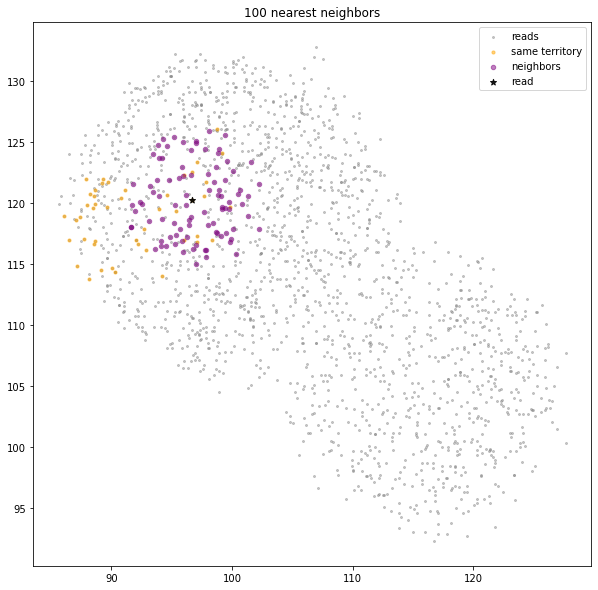

8340    16175
7900     7980
7935     8174
8782    21807
7862     7780
        ...  
7360       37
8177    11159
7645     1926
8043     9154
8272    14192
Name: amp_ind, Length: 92, dtype: int64

In [40]:
cell_1 = data_simp.loc[data_simp.cell_index==3]
get_neighbor_reads(cell_1, 6, True)

In [189]:
for K in [50, 150]:
    for stage in ['zygote', '4cell', '2cell']:
        df = data_simp.loc[(data_simp.stage == stage)]
        scores = return_separation_scores(df, K)
        scores.to_csv("separation_scores/{}_sep_scores_K{}.csv".format(stage,K), index = False)

cell index: 1   num reads: 6181
48.48597168922424
cell index: 2   num reads: 1163
55.9821240901947
cell index: 3   num reads: 1917
68.56703925132751
cell index: 4   num reads: 2407
84.99599051475525
cell index: 5   num reads: 1356
93.90482354164124
cell index: 6   num reads: 3755
120.9642264842987
cell index: 7   num reads: 6878
176.95046734809875
cell index: 8   num reads: 7091
234.29924249649048
cell index: 9   num reads: 2713
253.05563378334045
cell index: 10   num reads: 5748
297.9403097629547
cell index: 11   num reads: 5000
336.1952826976776
cell index: 12   num reads: 1562
346.5230438709259
cell index: 13   num reads: 5910
392.7967071533203
cell index: 14   num reads: 4006
421.91232681274414
cell index: 15   num reads: 3397
446.12176871299744
cell index: 16   num reads: 2475
463.2305521965027
cell index: 17   num reads: 3266
486.4443325996399
cell index: 18   num reads: 6715
540.9459328651428
cell index: 19   num reads: 2079
555.0628788471222
cell index: 20   num reads: 3961
583

158.96583032608032
cell index: 95   num reads: 999
165.29535341262817
cell index: 96   num reads: 1091
172.20580506324768
cell index: 97   num reads: 998
178.50284790992737
cell index: 98   num reads: 453
178.50384855270386
cell index: 99   num reads: 2003
191.71256279945374
cell index: 100   num reads: 1748
203.09531688690186
cell index: 101   num reads: 1703
214.29312419891357
cell index: 102   num reads: 1008
220.72148990631104
cell index: 103   num reads: 1265
228.83767247200012
cell index: 104   num reads: 501
231.96636486053467
cell index: 105   num reads: 45
231.9672498703003
cell index: 106   num reads: 458
231.96800923347473
cell index: 107   num reads: 511
235.1539900302887
cell index: 108   num reads: 401
235.15502262115479
cell index: 109   num reads: 377
235.15578484535217
cell index: 110   num reads: 1260
243.23567605018616
cell index: 111   num reads: 1101
250.26982164382935
cell index: 112   num reads: 1064
257.07485818862915
cell index: 25   num reads: 594
3.8390390872

In [185]:
data_simp.loc[data_simp.stage == "4cell"]

embryo_id  cell_id  cell_index  stage  amp_ind    x_um_abs  \
185441         45        1          65  4cell        2   85.855457   
185442         45        1          65  4cell        4   87.805486   
185443         45        1          65  4cell        7   90.080520   
185444         45        1          65  4cell        9   88.563831   
185445         45        1          65  4cell       12   80.872048   
...           ...      ...         ...    ...      ...         ...   
230055         57        3         112  4cell     8058  135.906208   
230056         57        3         112  4cell     8066  140.456277   
230057         57        3         112  4cell     8069  145.656355   
230058         57        3         112  4cell     8101  134.606189   
230059         57        3         112  4cell     8143  140.781282   

          y_um_abs  z_um_abs  chr  hap_assignment  cluster  cluster_hap  \
185441  109.039138      33.0   19              -1        2           -1   
185442  112.722527      30.6   19              -1        2           -1   
185443  117.922605      33.8    7              -1        1           -1   
185444  113.589207      31.0   10              -1        2           -1   
185445  116.839255      41.4   16              -1        2           -1   
...            ...       ...  ...             ...      ...          ...   
230055   99.505662      27.8    6              -1        1           -1   
230056   98.638982      22.2   18              -1        1            1   
230057   98.855652      31.8    9              -1        2           -1   
230058  106.872439      29.4    7              -1        1            1   
230059  109.689148      29.4   12              -1        1           -1   

        cluster_hap_imputed  inlier chr_territory  
185441                   -1       1          19_2  
185442                   -1       1          19_2  
185443                   -1       1           7_1  
185444                   -1       1          10_2  
185445                   -1       1          16_2  
...                     ...     ...           ...  
230055                   -1       1           6_1  
230056                    1       1          18_1  
230057                   -1       1           9_2  
230058                    1       1           7_1  
230059                   -1       1          12_1  

[44619 rows x 15 columns]

In [4]:
zygotes = pd.read_csv("separation_scores/zygote_sep_scores_K100.csv") #size is reads X 3: cell_index, amp_ind, sep_score
_2cell = pd.read_csv("separation_scores/2cell_sep_scores_K100.csv")
_4cell = pd.read_csv("separation_scores/4cell_sep_scores_K100.csv")

#creating signed separation scores: negative=maternal
_2cell.loc[:,'signed_separation_score'] = _2cell.separation_score
_2cell.loc[_2cell.num_pat<_2cell.num_mat,'signed_separation_score'] = -1*_2cell.loc[_2cell.num_pat<_2cell.num_mat,'separation_score'] 
_4cell.loc[:,'signed_separation_score'] = _4cell.separation_score
_4cell.loc[_4cell.num_pat<_4cell.num_mat,'signed_separation_score'] = -1*_4cell.loc[_4cell.num_pat<_4cell.num_mat,'separation_score'] 
zygotes.loc[:,'signed_separation_score'] = zygotes.separation_score
zygotes.loc[zygotes.num_pat<zygotes.num_mat,'signed_separation_score'] = -1*zygotes.loc[zygotes.num_pat<zygotes.num_mat,'separation_score'] 



Text(0.5, 0.92, 'visualizing haplotype separation')

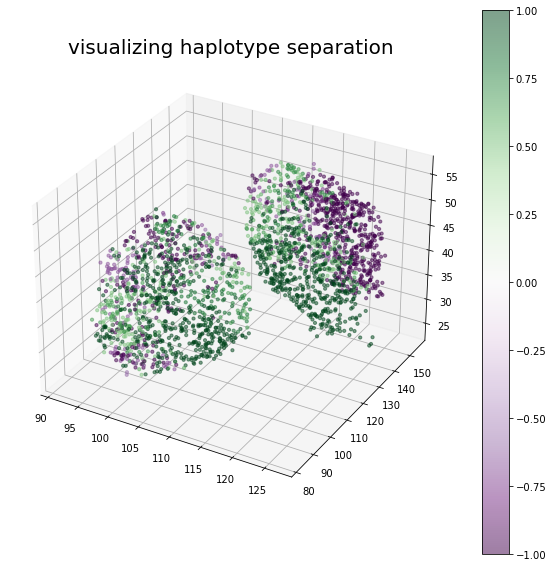

In [8]:
embryo = data_simp.loc[data_simp.embryo_id == 33].copy()
joined = pd.merge(embryo, _2cell, how = "inner" ,on = ['cell_index', 'amp_ind'])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
points = ax.scatter(joined.x_um_abs, joined.y_um_abs, joined.z_um_abs, s = 10, 
            c = joined.signed_separation_score, cmap = 'PRGn',
            marker = "o", alpha = 0.5, label = joined.separation_score)
plt.colorbar(points)
plt.title("visualizing haplotype separation", fontsize = 20)
# sns.scatterplot(data = joined, x = 'x_um_abs', y = 'y_um_abs', s = 10, color = 'signed_separation_score')

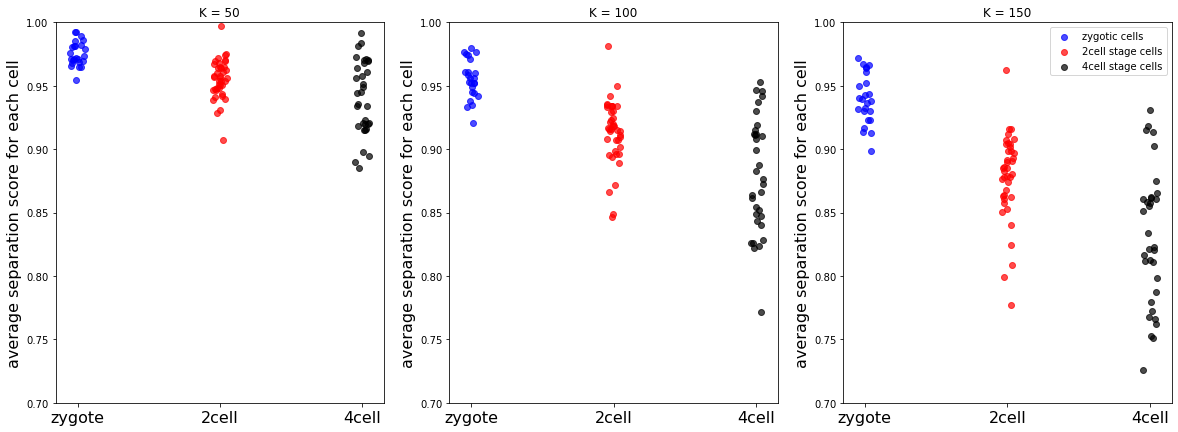

In [43]:
fig = plt.figure(figsize = (20,7))
for i,K in enumerate([50,100,150]):

    zygotes = pd.read_csv("separation_scores/zygote_sep_scores_K{}.csv".format(K)) #size is reads X 3: cell_index, amp_ind, sep_score
    _2cell = pd.read_csv("separation_scores/2cell_sep_scores_K{}.csv".format(K))
    _4cell = pd.read_csv("separation_scores/4cell_sep_scores_K{}.csv".format(K))


    #calucating the average of separation scores for each cell
    zygote_scores = zygotes.groupby('cell_index').mean().separation_score
    _2cell_scores = _2cell.groupby('cell_index').mean().separation_score
    _4cell_scores = _4cell.groupby('cell_index').mean().separation_score

    plt.subplot(1,3,i+1)
    plt.scatter(np.zeros(zygote_scores.shape[0]) + np.random.uniform(-0.05, 0.05, size =zygote_scores.shape[0]), 
                zygote_scores, color = 'blue', marker = 'o', alpha = 0.7, label = "zygotic cells")
    plt.scatter(np.ones(_2cell_scores.shape[0])+ np.random.uniform(-0.05, 0.05, size =_2cell_scores.shape[0]),
                _2cell_scores, color = 'red', marker = 'o',alpha = 0.7,  label = "2cell stage cells")
    plt.scatter(2*np.ones(_4cell_scores.shape[0])+ np.random.uniform(-0.05, 0.05, size =_4cell_scores.shape[0]), 
                _4cell_scores, color = 'black', marker = 'o', alpha = 0.7, label = "4cell stage cells")
    
    plt.ylim(0.7,1)
    plt.xticks(ticks = [0,1,2], labels = ['zygote', '2cell', '4cell'], fontsize = 16)
    plt.title("K = {}".format(K))
    plt.ylabel("average separation score for each cell", fontsize = 16)


plt.legend()
plt.savefig("figures/IGS_separation_scores.png")

## Potential porblems with this method:



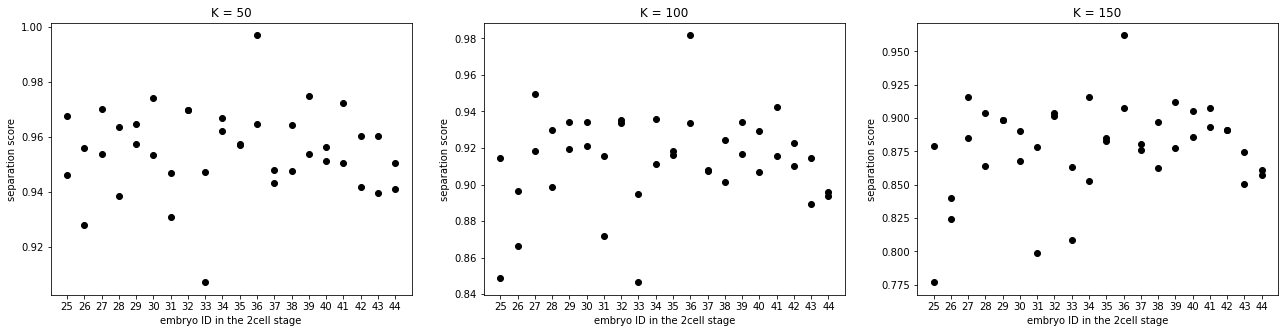

In [45]:
fig = plt.figure(figsize = (22,5))
embryos = data_simp.loc[data_simp.stage == '2cell', 'embryo_id'].unique()
for i,K in enumerate([50,100,150]):
    _2cell = pd.read_csv("separation_scores/2cell_sep_scores_K{}.csv".format(K))
    
    for embryo in embryos:
        plt.subplot(1,3,i+1)
        joined = pd.merge(data_simp.loc[data_simp.embryo_id == embryo], _2cell, how = "inner" ,on = ['cell_index', 'amp_ind'])
        plt.scatter(embryo * np.ones(2), joined.groupby('cell_index').mean().separation_score, color = 'black', marker = 'o', label = "2cell stage cells")
        plt.xticks(embryos.astype(int)) 
        plt.xlabel("embryo ID in the 2cell stage")

        plt.title("K = {}".format(K))

        plt.ylabel("separation score")
plt.savefig("figures/IGS_separation_score_2cell.png")
plt.show()


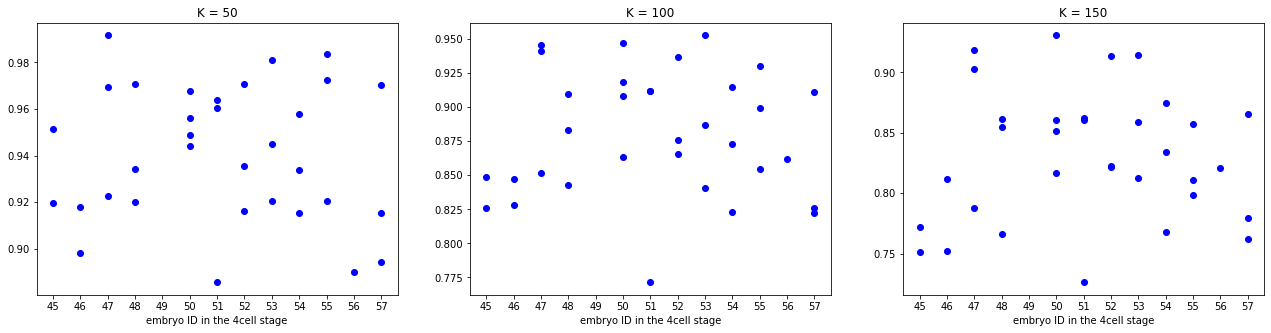

In [46]:
fig = plt.figure(figsize = (22,5))
embryos = data_simp.loc[data_simp.stage == '4cell', 'embryo_id'].unique()
for i,K in enumerate([50,100,150]):
    _4cell = pd.read_csv("separation_scores/4cell_sep_scores_K{}.csv".format(K))
    for embryo in embryos:
        plt.subplot(1,3,i+1)
        joined = pd.merge(data_simp.loc[data_simp.embryo_id == embryo], _4cell, how = "inner" ,on = ['cell_index', 'amp_ind'])
        assert(joined.shape[0] == data_simp.loc[data_simp.embryo_id == embryo].shape[0])
        scores = joined.groupby('cell_index').mean().separation_score
        plt.scatter(embryo * np.ones_like(scores), scores, color = 'blue', marker = 'o', label = "2cell stage cells")
        plt.title("K = {}".format(K))
        plt.xticks(embryos.astype(int)) 
        plt.xlabel("embryo ID in the 4cell stage")
plt.savefig("figures/IGS_separation_score_4cell.png")
plt.show()

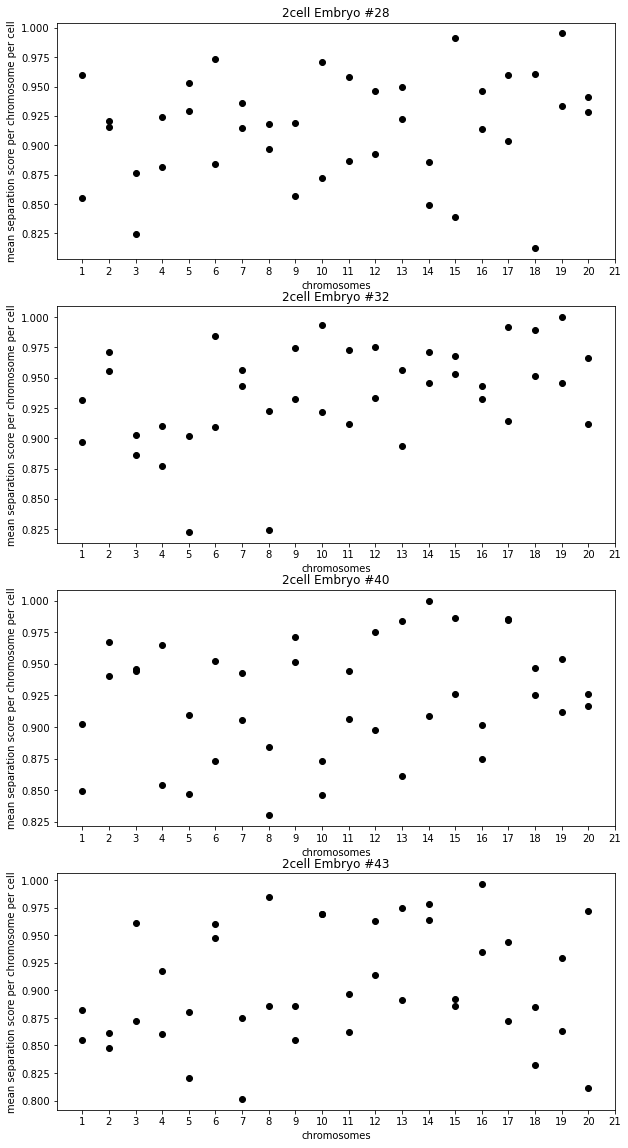

In [41]:
# print_full(joined.groupby(['chr_territory','cell_id']).separation_score.mean())
fig = plt.figure(figsize = (10,20))
_2cell = pd.read_csv("separation_scores/2cell_sep_scores_K{}.csv".format(100))
for i,embryo_id in enumerate([28, 32, 40,43]):
    embryo = data_simp.loc[data_simp.embryo_id == embryo_id]
    
    joined = pd.merge(embryo, _2cell, how = "inner" ,on = ['cell_index', 'amp_ind'])
    chromosomes = np.arange(1,22,1)
    for chrom in chromosomes:
        plt.subplot(4,1,i+1)
        scores = joined.loc[joined.chr == chrom].groupby('cell_id').mean().separation_score
        plt.scatter(chrom * np.ones_like(scores), scores, color = 'black', marker = 'o', label = "2cell stage cells")
        plt.xticks(chromosomes) 
        plt.xlabel("chromosomes")

        plt.title("2cell Embryo #{}".format(embryo_id))

        plt.ylabel("mean separation score per chromosome per cell")
plt.show()

In [45]:
np.mean(data_simp.loc[data_simp.stage=='zygote', 'hap_assignment']!= -1)

0.032775497990937846

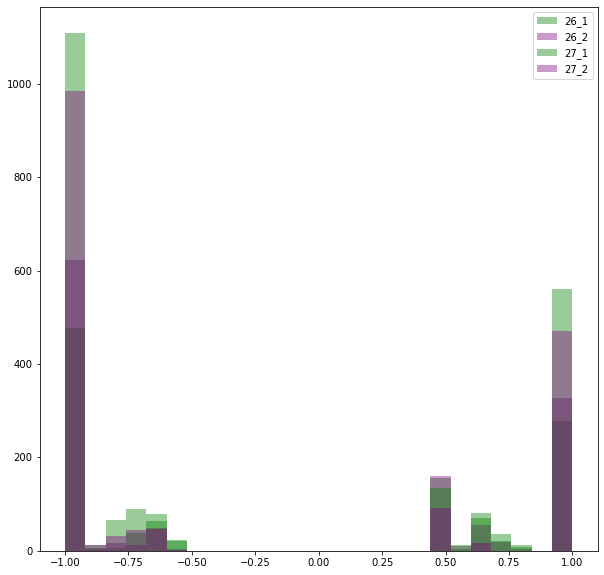

In [180]:
plt.figure(figsize=(10,10))
for embryo_id in [26, 27]:
    embryo = data_simp.loc[data_simp.embryo_id == embryo_id]
    joined = pd.merge(embryo, _2cell, how = "inner" ,on = ['cell_index', 'amp_ind'])
    cells = embryo.cell_id.unique()
    colors = ["green", 'purple']
    for cell in cells:
        plt.hist(joined.loc[joined.cell_id==cell,'signed_separation_score'], color = colors[cell-1], alpha = 0.4, bins = 25, label = str(embryo_id)+"_"+str(cell))
plt.legend()    


In [4]:
#change K and see how the result changes

In [170]:
cells

array([1, 2])